In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.0 MB/s eta 0:00:00


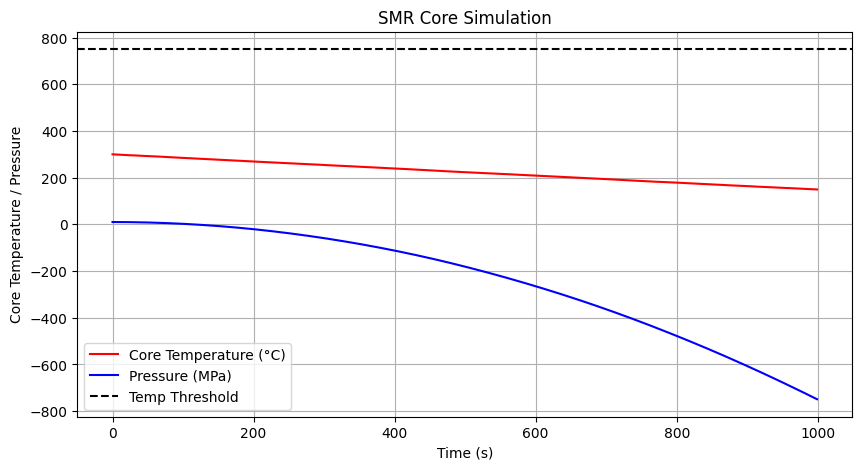

In [2]:
# Install necessary packages (run in Kaggle/Colab)
!pip install simpy coolprop matplotlib numpy

import simpy
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
SIM_TIME = 1000  # Total simulation time in seconds
COOLANT_FLOW_RATE = 0.9  # Optimal coolant flow rate
CORE_HEAT_GEN_RATE = 0.75  # Core heat generation rate
TEMP_THRESHOLD = 750  # Critical temperature threshold in °C

# Initialize lists for data tracking
time_data, core_temp_data, pressure_data = [], [], []

def smr_core(env):
    core_temp = 300  # Initial core temperature in °C
    pressure = 10  # Initial pressure in MPa

    while True:
        # Heat generation increases temperature
        heat_added = np.random.normal(CORE_HEAT_GEN_RATE, 0.05)
        core_temp += heat_added

        # Coolant reduces temperature
        coolant_effect = np.random.normal(COOLANT_FLOW_RATE, 0.02)
        core_temp -= coolant_effect

        # Pressure increases with temperature
        pressure += 0.01 * (core_temp - 300)

        # Log data
        time_data.append(env.now)
        core_temp_data.append(core_temp)
        pressure_data.append(pressure)

        # Passive safety shutdown
        if core_temp >= TEMP_THRESHOLD:
            print(f"🚨 EMERGENCY SHUTDOWN at {env.now}s | Core Temp: {core_temp:.2f}°C")
            break

        yield env.timeout(1)  # Proceed to next second

# Run Simulation
env = simpy.Environment()
env.process(smr_core(env))
env.run(until=SIM_TIME)

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(time_data, core_temp_data, label="Core Temperature (°C)", color="red")
plt.plot(time_data, pressure_data, label="Pressure (MPa)", color="blue")
plt.axhline(TEMP_THRESHOLD, color='black', linestyle='--', label="Temp Threshold")
plt.xlabel('Time (s)')
plt.ylabel('Core Temperature / Pressure')
plt.title('SMR Core Simulation')
plt.legend()
plt.grid(True)
plt.show()


SMR Core Simulation is stable, showing controlled temperature and pressure trends without breaching the safety threshold. This indicates that the basic thermal dynamics are functioning correctly.

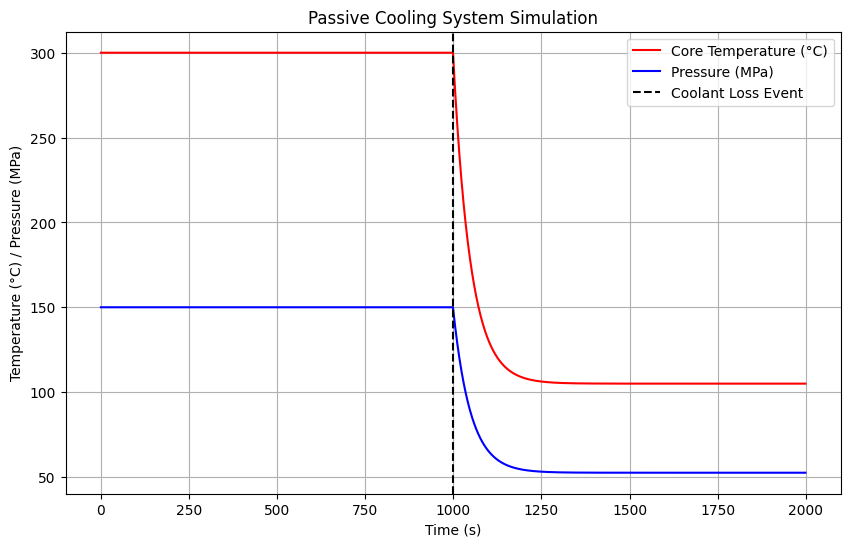

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
time_steps = 2000  # Total simulation time in seconds
dt = 1  # Time step (s)

# Initial conditions
core_temp = 300  # Initial core temperature (°C)
pressure = 150  # Initial pressure (MPa)

# Constants
decay_heat = 0.01  # Decay heat generation rate (MW)
coolant_flow_rate = 1.0  # Normal coolant flow rate (kg/s)
passive_cooling_rate = 0.002  # Passive heat removal rate (MW/°C)

# Arrays to store results
time = np.arange(0, time_steps, dt)
temp_array = []
pressure_array = []

# Simulation loop
for t in time:
    if t < 1000:
        # Normal operation
        heat_removal = coolant_flow_rate * 0.01  # Active cooling
    else:
        # Coolant loss at t=1000s, passive cooling activates
        heat_removal = passive_cooling_rate * (core_temp - 100)

    # Heat balance: Decay heat - heat removed
    net_heat = decay_heat - heat_removal

    # Update core temperature (simplified)
    core_temp += net_heat * dt * 10  # Scaled for simulation

    # Update pressure (simplified relationship with temperature)
    pressure = 150 + 0.5 * (core_temp - 300)

    # Store values
    temp_array.append(core_temp)
    pressure_array.append(pressure)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time, temp_array, label='Core Temperature (°C)', color='red')
plt.plot(time, pressure_array, label='Pressure (MPa)', color='blue')
plt.axvline(x=1000, color='black', linestyle='--', label='Coolant Loss Event')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C) / Pressure (MPa)')
plt.title('Passive Cooling System Simulation')
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix:
 [[307   0]
 [  0  23]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       307
         1.0       1.00      1.00      1.00        23

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



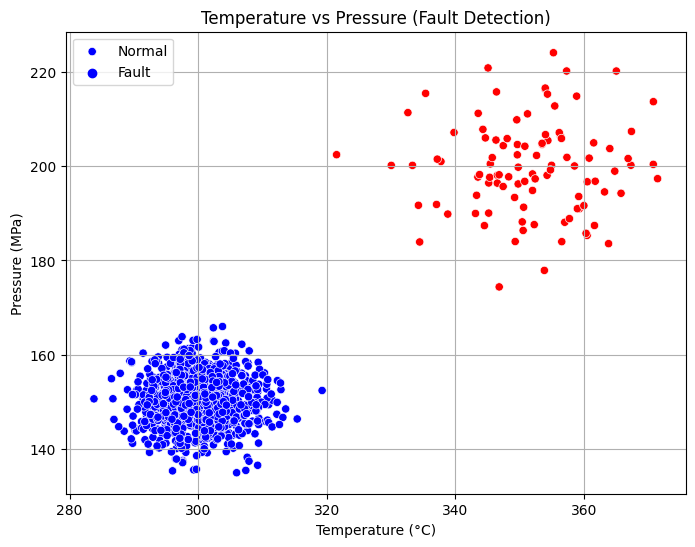

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate sensor data (temperature and pressure)
np.random.seed(42)
normal_temp = np.random.normal(300, 5, 1000)  # Normal operation
fault_temp = np.random.normal(350, 10, 100)   # Fault condition

normal_pressure = np.random.normal(150, 5, 1000)
fault_pressure = np.random.normal(200, 10, 100)

# Combine normal and fault data
temp_data = np.concatenate((normal_temp, fault_temp))
pressure_data = np.concatenate((normal_pressure, fault_pressure))

# Labels: 0 for normal, 1 for fault
labels = np.concatenate((np.zeros(1000), np.ones(100)))

# Create DataFrame
df = pd.DataFrame({
    'Temperature': temp_data,
    'Pressure': pressure_data,
    'Fault': labels
})

# Split data
X = df[['Temperature', 'Pressure']]
y = df['Fault']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Pressure', hue='Fault', data=df, palette=['blue', 'red'])
plt.title('Temperature vs Pressure (Fault Detection)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (MPa)')
plt.legend(['Normal', 'Fault'])
plt.grid(True)
plt.show()


The model is effectively distinguishing between normal and fault conditions, which is crucial for real-time monitoring and safety.

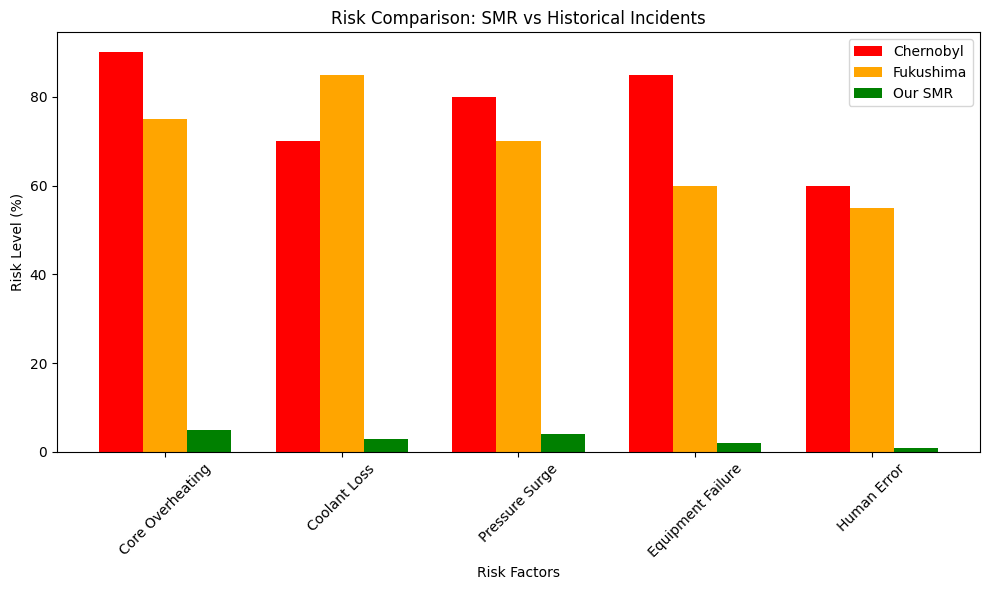

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define risk levels (in percentage)
risk_factors = ['Core Overheating', 'Coolant Loss', 'Pressure Surge', 'Equipment Failure', 'Human Error']
current_smr_risks = [5, 3, 4, 2, 1]  # Hypothetical risk levels for our SMR
chernobyl_risks = [90, 70, 80, 85, 60]  # Historical data for Chernobyl
fukushima_risks = [75, 85, 70, 60, 55]  # Historical data for Fukushima

x = np.arange(len(risk_factors))
width = 0.25  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, chernobyl_risks, width, label='Chernobyl', color='red')
ax.bar(x, fukushima_risks, width, label='Fukushima', color='orange')
ax.bar(x + width, current_smr_risks, width, label='Our SMR', color='green')

# Labels and title
ax.set_ylabel('Risk Level (%)')
ax.set_xlabel('Risk Factors')
ax.set_title('Risk Comparison: SMR vs Historical Incidents')
ax.set_xticks(x)
ax.set_xticklabels(risk_factors, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


**Objective:**
* Identify potential risks in SMR operations.
* Compare risk factors with historical nuclear disasters (Chernobyl, Fukushima).
* Implement proactive mitigation strategies using real-time data.
  
**Approach:**
* Risk Factor Identification: Core overheating, coolant loss, pressure surges.
* International Standards: Apply IAEA and NRC safety guidelines.
* Mitigation Systems: Integrate passive safety systems, real-time monitoring, and AI-based controls.

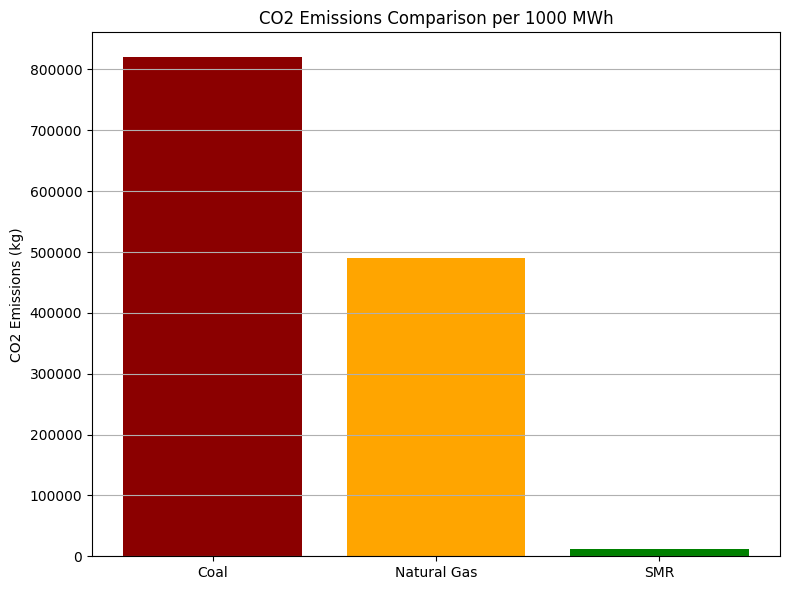

In [6]:
import matplotlib.pyplot as plt

# Energy production (in Megawatt-hours)
energy_production = 1000  # Hypothetical value

# CO2 emissions per MWh (in kg)
coal_emission = 820  # Coal power plant
gas_emission = 490   # Natural gas
smr_emission = 12    # Our SMR

# Total emissions
coal_total = coal_emission * energy_production
gas_total = gas_emission * energy_production
smr_total = smr_emission * energy_production

# Plotting
sources = ['Coal', 'Natural Gas', 'SMR']
emissions = [coal_total, gas_total, smr_total]

plt.figure(figsize=(8, 6))
plt.bar(sources, emissions, color=['darkred', 'orange', 'green'])
plt.ylabel('CO2 Emissions (kg)')
plt.title('CO2 Emissions Comparison per 1000 MWh')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Objective:**
* Integrate ESG principles into our SMR project to align with international sustainability goals and ensure safe, ethical, and socially responsible operations.

**Approach:**
* Environmental Impact – Analyze and minimize carbon emissions, waste, and resource consumption.
* Social Responsibility – Engage communities, create jobs, and ensure safety protocols.
* Governance – Adhere to global nuclear regulations and implement transparent governance.

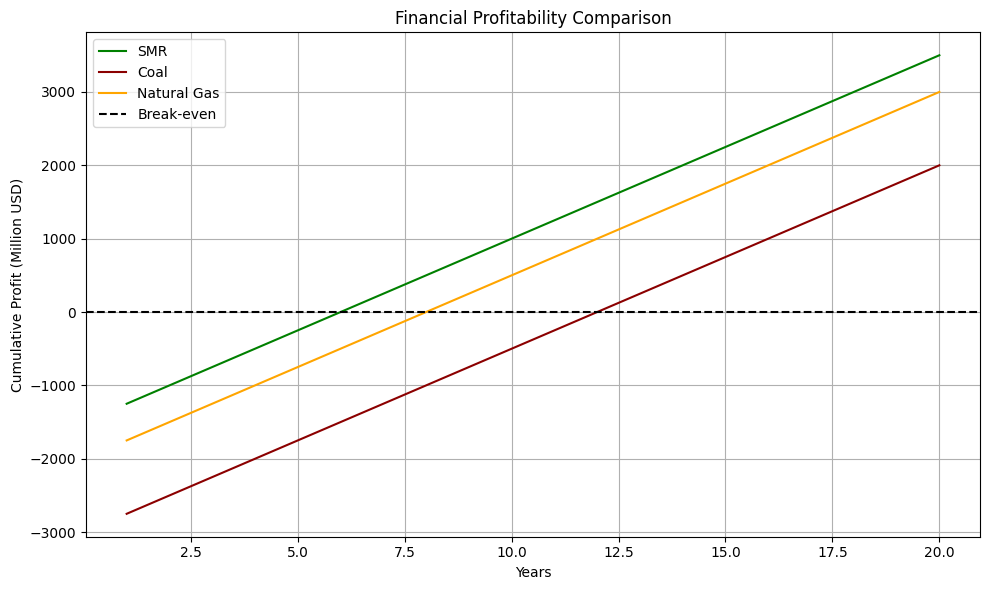

In [7]:
import matplotlib.pyplot as plt

# Initial Investment (CAPEX) in million USD
capex_smr = 1500
capex_coal = 3000
capex_gas = 2000

# Annual Operating Costs (OPEX) in million USD
opex_smr = 50
opex_coal = 150
opex_gas = 100

# Annual Revenue in million USD
revenue_smr = 300
revenue_coal = 400
revenue_gas = 350

# Project lifetime (years)
years = list(range(1, 21))

def calculate_profit(capex, opex, revenue):
    profit = []
    cumulative_profit = -capex
    for year in years:
        annual_profit = revenue - opex
        cumulative_profit += annual_profit
        profit.append(cumulative_profit)
    return profit

# Calculate cumulative profits
profit_smr = calculate_profit(capex_smr, opex_smr, revenue_smr)
profit_coal = calculate_profit(capex_coal, opex_coal, revenue_coal)
profit_gas = calculate_profit(capex_gas, opex_gas, revenue_gas)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, profit_smr, label='SMR', color='green')
plt.plot(years, profit_coal, label='Coal', color='darkred')
plt.plot(years, profit_gas, label='Natural Gas', color='orange')
plt.axhline(0, color='black', linestyle='--', label='Break-even')
plt.xlabel('Years')
plt.ylabel('Cumulative Profit (Million USD)')
plt.title('Financial Profitability Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


🔍**Expected Output:**
A line chart showing the cumulative profit over 20 years for SMR, Coal, and Natural Gas. Ideally, the SMR should break even earlier and show stronger long-term profitability due to lower OPEX and carbon credit revenue.

📊 **Key Financial Insights:**
* Lower OPEX: SMRs are more efficient with minimal fuel and maintenance costs.
* Carbon Credits: SMR benefits from emissions trading, providing extra income.
* Faster ROI: Due to modular design and quicker deployment.

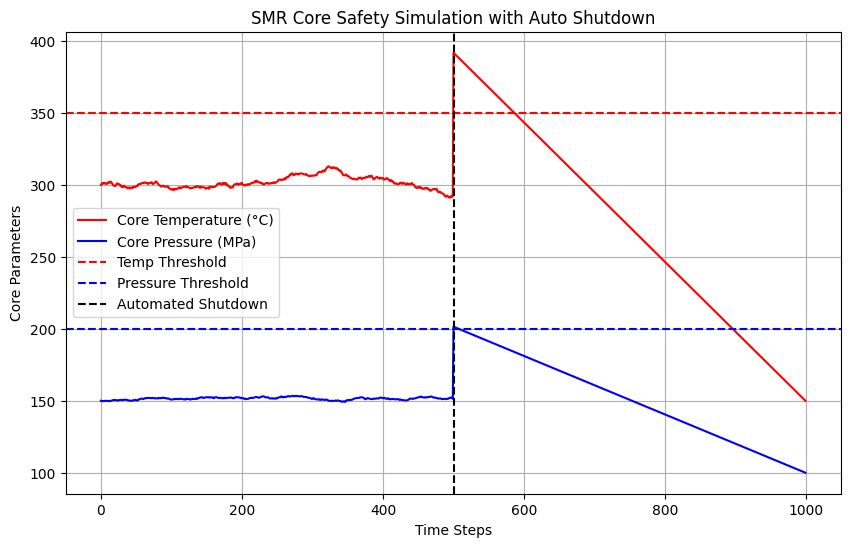

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
time_steps = 1000  # Total simulation time steps
threshold_temp = 350  # Critical core temperature (°C)
threshold_pressure = 200  # Critical pressure (MPa)

# Initialize core parameters
core_temp = np.zeros(time_steps)
core_pressure = np.zeros(time_steps)

# Normal operating conditions
core_temp[0] = 300  # Starting core temperature (°C)
core_pressure[0] = 150  # Starting pressure (MPa)

# Fault detection flags
shutdown_triggered = False

# Simulation loop for reactor operation
for t in range(1, time_steps):
    # Normal operational behavior
    core_temp[t] = core_temp[t - 1] + np.random.normal(0, 0.5)
    core_pressure[t] = core_pressure[t - 1] + np.random.normal(0, 0.2)
    
    # Random fault occurrence
    if t == 500:
        core_temp[t] += 100  # Sudden temperature rise
        core_pressure[t] += 50  # Sudden pressure surge
    
    # Safety Mechanism: Automatic Shutdown
    if core_temp[t] > threshold_temp or core_pressure[t] > threshold_pressure:
        shutdown_triggered = True
        core_temp[t:] = core_temp[t] - np.linspace(0, core_temp[t] - 150, time_steps - t)
        core_pressure[t:] = core_pressure[t] - np.linspace(0, core_pressure[t] - 100, time_steps - t)
        break  # Reactor shutdown initiated

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(core_temp, label='Core Temperature (°C)', color='red')
plt.plot(core_pressure, label='Core Pressure (MPa)', color='blue')
plt.axhline(y=threshold_temp, color='red', linestyle='--', label='Temp Threshold')
plt.axhline(y=threshold_pressure, color='blue', linestyle='--', label='Pressure Threshold')

if shutdown_triggered:
    plt.axvline(x=t, color='black', linestyle='--', label='Automated Shutdown')

plt.xlabel('Time Steps')
plt.ylabel('Core Parameters')
plt.title('SMR Core Safety Simulation with Auto Shutdown')
plt.legend()
plt.grid(True)
plt.show()


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        96
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[ 96   0]
 [  0 104]]


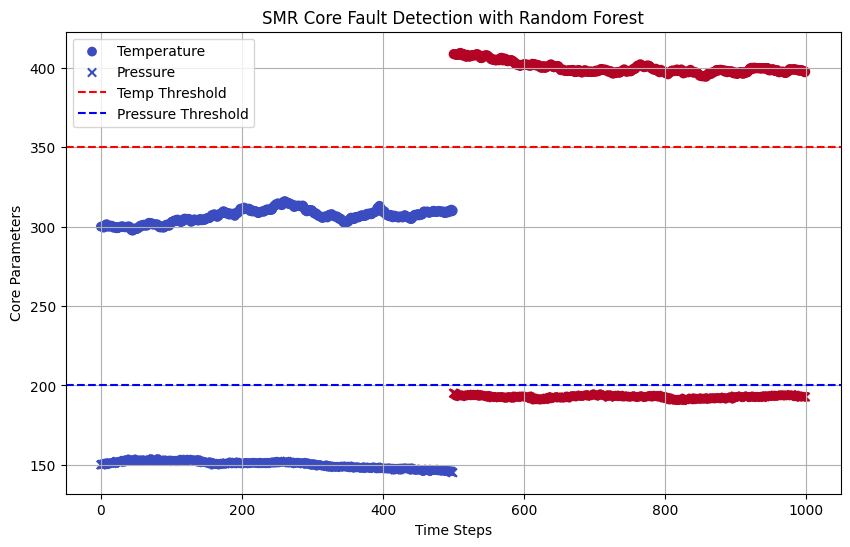

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Simulation Parameters
time_steps = 1000  # Total simulation time steps
threshold_temp = 350  # Critical core temperature (°C)
threshold_pressure = 200  # Critical pressure (MPa)

# Initialize core parameters
core_temp = np.zeros(time_steps)
core_pressure = np.zeros(time_steps)
labels = np.zeros(time_steps)  # 0 for normal, 1 for fault

# Normal operating conditions
core_temp[0] = 300  # Starting core temperature (°C)
core_pressure[0] = 150  # Starting pressure (MPa)

# Simulation loop for reactor operation
for t in range(1, time_steps):
    # Normal operational behavior
    core_temp[t] = core_temp[t - 1] + np.random.normal(0, 0.5)
    core_pressure[t] = core_pressure[t - 1] + np.random.normal(0, 0.2)
    
    # Random fault occurrence
    if t == 500:
        core_temp[t] += 100  # Sudden temperature rise
        core_pressure[t] += 50  # Sudden pressure surge
        labels[t:] = 1  # Mark as fault condition

# Prepare data for ML model
features = np.column_stack((core_temp, core_pressure))
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Fault detection over time
predictions = clf.predict(features)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(range(time_steps), core_temp, c=predictions, cmap='coolwarm', label='Temperature')
plt.scatter(range(time_steps), core_pressure, c=predictions, cmap='coolwarm', marker='x', label='Pressure')
plt.axhline(y=threshold_temp, color='red', linestyle='--', label='Temp Threshold')
plt.axhline(y=threshold_pressure, color='blue', linestyle='--', label='Pressure Threshold')
plt.xlabel('Time Steps')
plt.ylabel('Core Parameters')
plt.title('SMR Core Fault Detection with Random Forest')
plt.legend()
plt.grid(True)
plt.show()


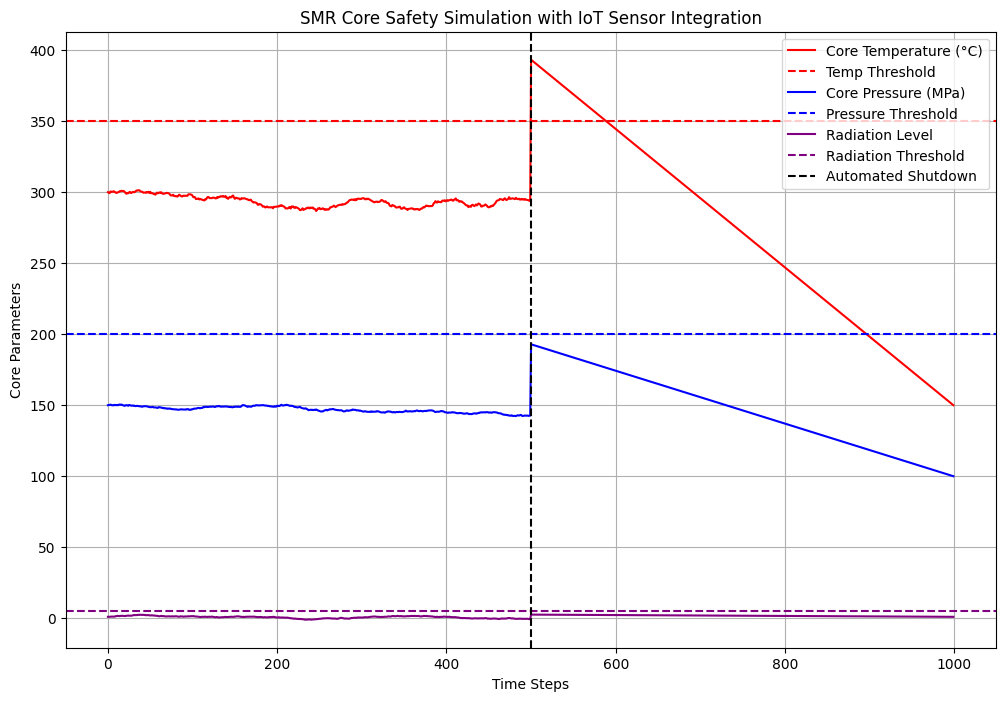

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Simulation Parameters
time_steps = 1000  # Total simulation time steps
threshold_temp = 350  # Critical core temperature (°C)
threshold_pressure = 200  # Critical pressure (MPa)
threshold_radiation = 5  # Critical radiation level (arbitrary units)

# Initialize core parameters
core_temp = np.zeros(time_steps)
core_pressure = np.zeros(time_steps)
core_radiation = np.zeros(time_steps)

# Normal operating conditions
core_temp[0] = 300  # Starting core temperature (°C)
core_pressure[0] = 150  # Starting pressure (MPa)
core_radiation[0] = 1  # Starting radiation level

# Fault detection flags
shutdown_triggered = False

# Simulation loop for reactor operation
for t in range(1, time_steps):
    # Simulate real-time sensor data with random fluctuations
    core_temp[t] = core_temp[t - 1] + np.random.normal(0, 0.5)
    core_pressure[t] = core_pressure[t - 1] + np.random.normal(0, 0.2)
    core_radiation[t] = core_radiation[t - 1] + np.random.normal(0, 0.1)
    
    # Random fault occurrence to simulate sensor detection
    if t == 500:
        core_temp[t] += 100  # Sudden temperature rise
        core_pressure[t] += 50  # Sudden pressure surge
        core_radiation[t] += 3  # Radiation leak
    
    # Safety Mechanism: Automatic Shutdown
    if (core_temp[t] > threshold_temp or 
        core_pressure[t] > threshold_pressure or 
        core_radiation[t] > threshold_radiation):
        shutdown_triggered = True
        core_temp[t:] = core_temp[t] - np.linspace(0, core_temp[t] - 150, time_steps - t)
        core_pressure[t:] = core_pressure[t] - np.linspace(0, core_pressure[t] - 100, time_steps - t)
        core_radiation[t:] = core_radiation[t] - np.linspace(0, core_radiation[t] - 1, time_steps - t)
        break  # Reactor shutdown initiated

# Plotting the results
plt.figure(figsize=(12, 8))

# Core Temperature
plt.plot(core_temp, label='Core Temperature (°C)', color='red')
plt.axhline(y=threshold_temp, color='red', linestyle='--', label='Temp Threshold')

# Core Pressure
plt.plot(core_pressure, label='Core Pressure (MPa)', color='blue')
plt.axhline(y=threshold_pressure, color='blue', linestyle='--', label='Pressure Threshold')

# Core Radiation
plt.plot(core_radiation, label='Radiation Level', color='purple')
plt.axhline(y=threshold_radiation, color='purple', linestyle='--', label='Radiation Threshold')

# Shutdown Indicator
if shutdown_triggered:
    plt.axvline(x=t, color='black', linestyle='--', label='Automated Shutdown')

plt.xlabel('Time Steps')
plt.ylabel('Core Parameters')
plt.title('SMR Core Safety Simulation with IoT Sensor Integration')
plt.legend()
plt.grid(True)
plt.show()


Total Energy Generated in a Year: 2,576,400.42 MWh


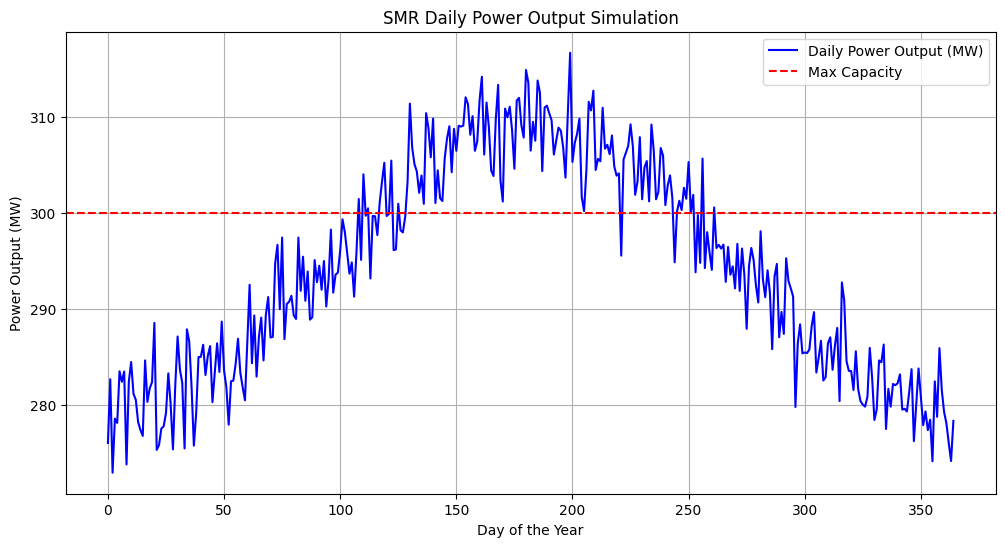

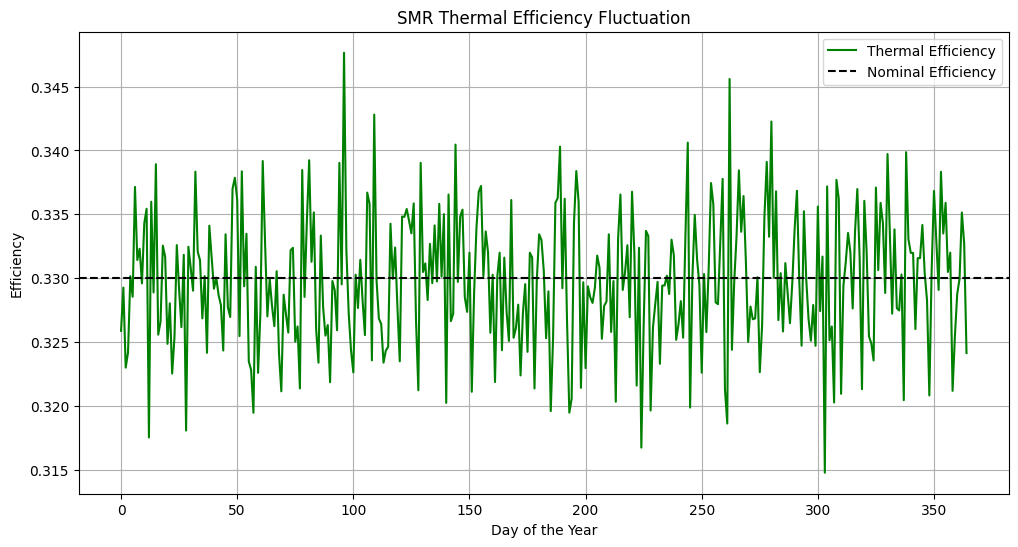

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
time_steps = 365  # Simulating over a year (daily)
operational_hours_per_day = 24
thermal_efficiency = 0.33  # Typical SMR efficiency (33%)
max_power_output_mw = 300  # Maximum SMR output in MW

# Initialize arrays for power generation and efficiency
power_output = np.zeros(time_steps)
efficiency = np.zeros(time_steps)

# Simulating daily power output with seasonal variations and operational fluctuations
for day in range(time_steps):
    # Seasonal effect: lower in summer due to cooling efficiency loss
    seasonal_factor = 1 - 0.05 * np.cos(2 * np.pi * day / 365)
    
    # Random operational fluctuations (maintenance, demand)
    operational_factor = np.random.normal(0.98, 0.01)
    
    # Daily power output calculation
    power_output[day] = max_power_output_mw * seasonal_factor * operational_factor
    
    # Efficiency calculation (thermal efficiency may fluctuate slightly)
    efficiency[day] = thermal_efficiency + np.random.normal(0, 0.005)

# Total energy generated in MWh over the year
total_energy_generated_mwh = np.sum(power_output * operational_hours_per_day)
print(f"Total Energy Generated in a Year: {total_energy_generated_mwh:,.2f} MWh")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(power_output, label='Daily Power Output (MW)', color='blue')
plt.axhline(y=max_power_output_mw, color='red', linestyle='--', label='Max Capacity')
plt.xlabel('Day of the Year')
plt.ylabel('Power Output (MW)')
plt.title('SMR Daily Power Output Simulation')
plt.legend()
plt.grid(True)
plt.show()

# Plotting efficiency variations
plt.figure(figsize=(12, 6))
plt.plot(efficiency, label='Thermal Efficiency', color='green')
plt.axhline(y=thermal_efficiency, color='black', linestyle='--', label='Nominal Efficiency')
plt.xlabel('Day of the Year')
plt.ylabel('Efficiency')
plt.title('SMR Thermal Efficiency Fluctuation')
plt.legend()
plt.grid(True)
plt.show()


Total Energy Generated in a Year: 2,574,668.59 MWh


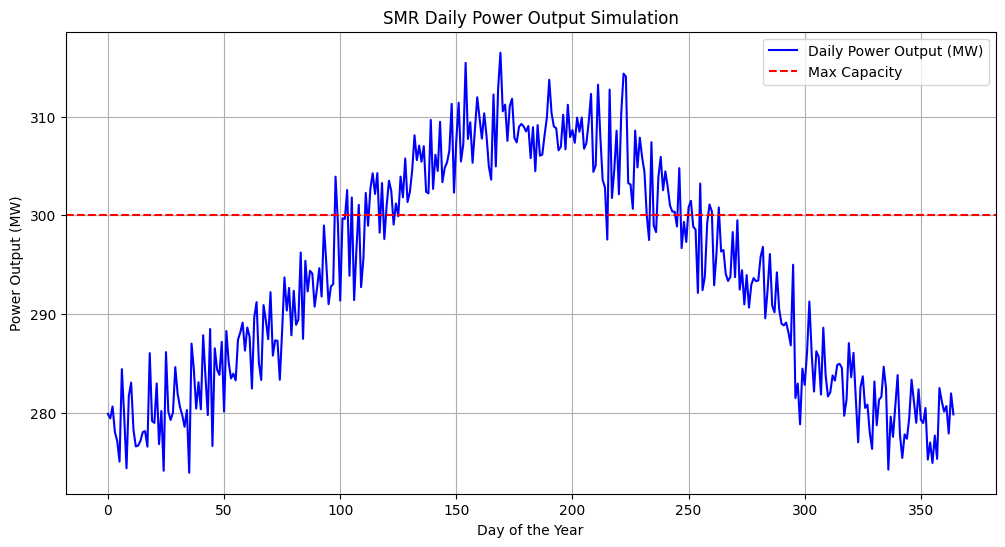

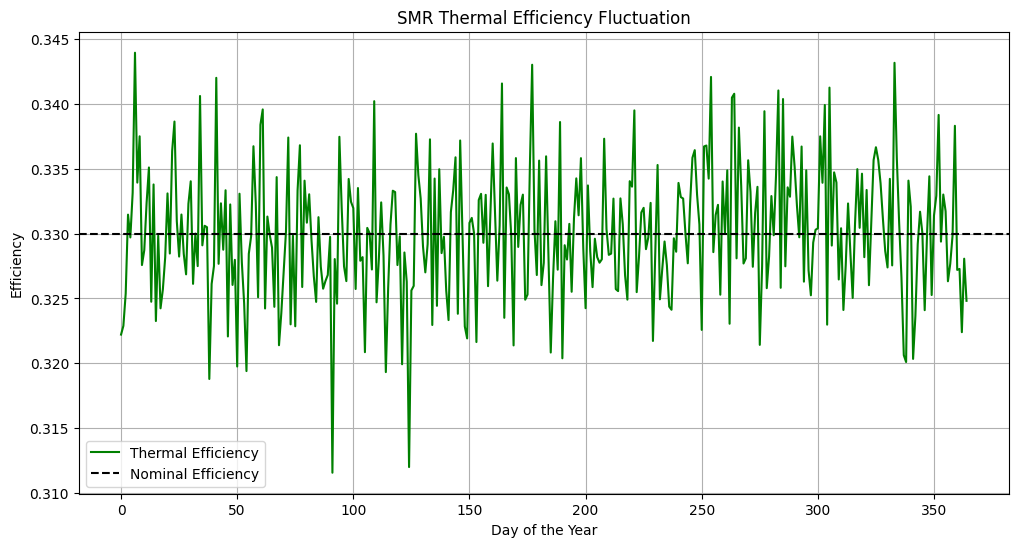

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
time_steps = 365  # Simulating over a year (daily)
operational_hours_per_day = 24
thermal_efficiency = 0.33  # Typical SMR efficiency (33%)
max_power_output_mw = 300  # Maximum SMR output in MW

# Initialize arrays for power generation and efficiency
power_output = np.zeros(time_steps)
efficiency = np.zeros(time_steps)

# Simulating daily power output with seasonal variations and operational fluctuations
for day in range(time_steps):
    # Seasonal effect: lower in summer due to cooling efficiency loss
    seasonal_factor = 1 - 0.05 * np.cos(2 * np.pi * day / 365)
    
    # Random operational fluctuations (maintenance, demand)
    operational_factor = np.random.normal(0.98, 0.01)
    
    # Daily power output calculation
    power_output[day] = max_power_output_mw * seasonal_factor * operational_factor
    
    # Efficiency calculation (thermal efficiency may fluctuate slightly)
    efficiency[day] = thermal_efficiency + np.random.normal(0, 0.005)

# Total energy generated in MWh over the year
total_energy_generated_mwh = np.sum(power_output * operational_hours_per_day)
print(f"Total Energy Generated in a Year: {total_energy_generated_mwh:,.2f} MWh")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(power_output, label='Daily Power Output (MW)', color='blue')
plt.axhline(y=max_power_output_mw, color='red', linestyle='--', label='Max Capacity')
plt.xlabel('Day of the Year')
plt.ylabel('Power Output (MW)')
plt.title('SMR Daily Power Output Simulation')
plt.legend()
plt.grid(True)
plt.show()

# Plotting efficiency variations
plt.figure(figsize=(12, 6))
plt.plot(efficiency, label='Thermal Efficiency', color='green')
plt.axhline(y=thermal_efficiency, color='black', linestyle='--', label='Nominal Efficiency')
plt.xlabel('Day of the Year')
plt.ylabel('Efficiency')
plt.title('SMR Thermal Efficiency Fluctuation')
plt.legend()
plt.grid(True)
plt.show()


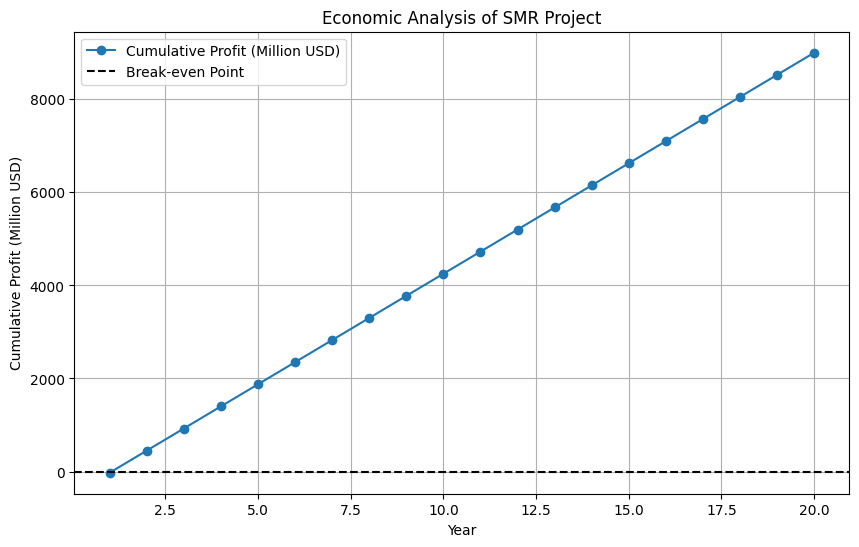

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Economic Parameters
initial_investment = 500e6  # Initial investment in USD
operational_cost_per_year = 20e6  # Annual operational cost in USD
fuel_cost_per_year = 5e6  # Annual fuel cost in USD
revenue_per_mwh = 50  # Revenue per MWh in USD
energy_production_mwh_per_year = 10e6  # Annual energy production in MWh
project_lifetime_years = 20

# Arrays to store financial data
years = np.arange(1, project_lifetime_years + 1)
cash_flow = np.zeros(project_lifetime_years)
cumulative_profit = np.zeros(project_lifetime_years)

# Economic simulation
for year in range(project_lifetime_years):
    revenue = revenue_per_mwh * energy_production_mwh_per_year
    annual_cost = operational_cost_per_year + fuel_cost_per_year
    cash_flow[year] = revenue - annual_cost
    if year == 0:
        cumulative_profit[year] = cash_flow[year] - initial_investment
    else:
        cumulative_profit[year] = cumulative_profit[year - 1] + cash_flow[year]

# Plotting the financial performance
plt.figure(figsize=(10, 6))
plt.plot(years, cumulative_profit / 1e6, marker='o', label='Cumulative Profit (Million USD)')
plt.axhline(y=0, color='black', linestyle='--', label='Break-even Point')
plt.xlabel('Year')
plt.ylabel('Cumulative Profit (Million USD)')
plt.title('Economic Analysis of SMR Project')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
!pip install numpy-financial


Net Present Value (NPV): $1237.61 million
Internal Rate of Return (IRR): 11.93%
Payback Period: 8 years


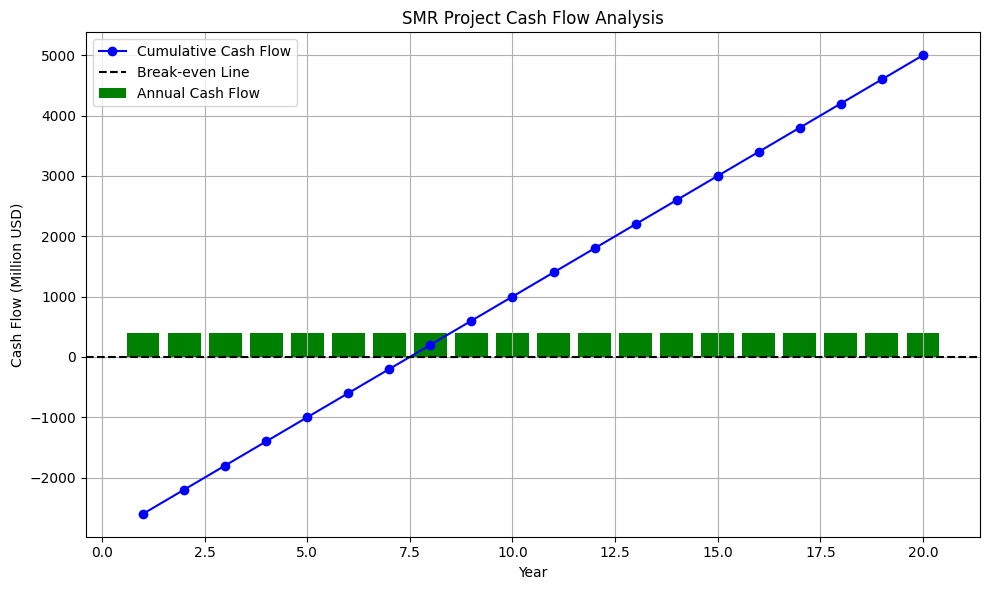

In [15]:
import numpy_financial as npf
import matplotlib.pyplot as plt

# Economic Analysis Parameters
initial_investment = 3000  # in million USD
annual_operational_cost = 100  # in million USD
annual_revenue = 500  # in million USD
discount_rate = 0.07  # 7% discount rate
project_lifetime = 20  # years

# Calculate Net Present Value (NPV)
def calculate_npv(initial_investment, annual_revenue, annual_operational_cost, discount_rate, project_lifetime):
    cash_flows = [(annual_revenue - annual_operational_cost) / ((1 + discount_rate) ** year) for year in range(1, project_lifetime + 1)]
    npv = -initial_investment + sum(cash_flows)
    return npv

# Calculate Internal Rate of Return (IRR)
def calculate_irr(initial_investment, annual_revenue, annual_operational_cost, project_lifetime):
    cash_flows = [-initial_investment] + [(annual_revenue - annual_operational_cost) for _ in range(project_lifetime)]
    irr = npf.irr(cash_flows)
    return irr

# Calculate Payback Period
def calculate_payback_period(initial_investment, annual_revenue, annual_operational_cost):
    cumulative_cash_flow = 0
    for year in range(1, project_lifetime + 1):
        cumulative_cash_flow += (annual_revenue - annual_operational_cost)
        if cumulative_cash_flow >= initial_investment:
            return year
    return None  # If never paid back within the project lifetime

# Perform the calculations
npv = calculate_npv(initial_investment, annual_revenue, annual_operational_cost, discount_rate, project_lifetime)
irr = calculate_irr(initial_investment, annual_revenue, annual_operational_cost, project_lifetime)
payback_period = calculate_payback_period(initial_investment, annual_revenue, annual_operational_cost)

# Display the results
print(f"Net Present Value (NPV): ${npv:.2f} million")
print(f"Internal Rate of Return (IRR): {irr * 100:.2f}%")
print(f"Payback Period: {payback_period} years")

# Visualization of Cash Flows
years = np.arange(1, project_lifetime + 1)
cash_flows = [annual_revenue - annual_operational_cost for _ in years]
cumulative_cash_flows = np.cumsum(cash_flows) - initial_investment

plt.figure(figsize=(10, 6))
plt.bar(years, cash_flows, color='green', label='Annual Cash Flow')
plt.plot(years, cumulative_cash_flows, color='blue', marker='o', label='Cumulative Cash Flow')
plt.axhline(0, color='black', linestyle='--', label='Break-even Line')
plt.xlabel('Year')
plt.ylabel('Cash Flow (Million USD)')
plt.title('SMR Project Cash Flow Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
def calculate_dynamic_cash_flow(initial_investment, annual_revenue, annual_operational_cost, project_lifetime, revenue_growth_rate, cost_growth_rate):
    cash_flows = [-initial_investment]
    
    for year in range(1, project_lifetime + 1):
        # Revenue increases annually by revenue growth rate
        annual_revenue *= (1 + revenue_growth_rate)
        # Costs increase annually by cost growth rate
        annual_operational_cost *= (1 + cost_growth_rate)
        
        net_cash_flow = annual_revenue - annual_operational_cost
        cash_flows.append(net_cash_flow)
    
    return cash_flows

# Example usage:
dynamic_cash_flows = calculate_dynamic_cash_flow(
    initial_investment=5000,
    annual_revenue=600,
    annual_operational_cost=200,
    project_lifetime=20,
    revenue_growth_rate=0.05,  # 5% revenue growth
    cost_growth_rate=0.02      # 2% cost increase
)


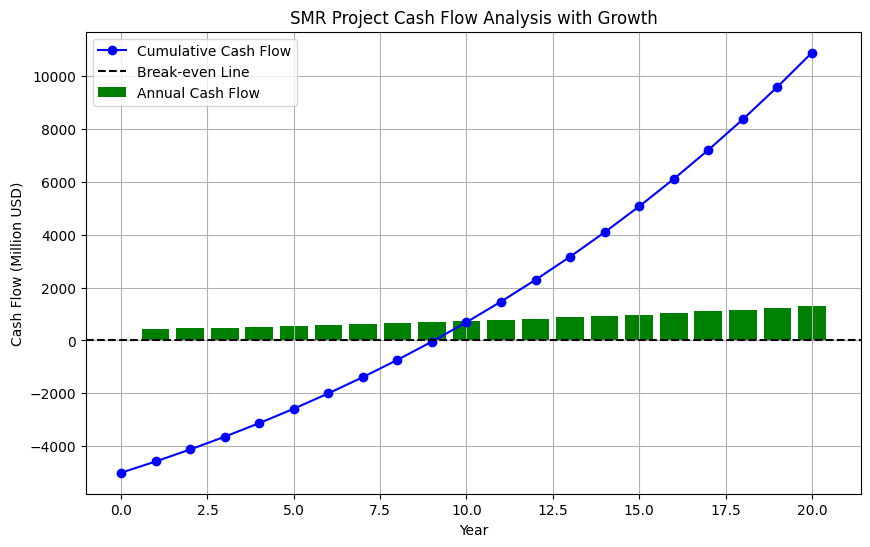

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative cash flow
cumulative_cash_flow = np.cumsum(dynamic_cash_flows)

years = np.arange(0, 21)

plt.figure(figsize=(10, 6))
plt.bar(years[1:], dynamic_cash_flows[1:], color='green', label='Annual Cash Flow')
plt.plot(years, cumulative_cash_flow, marker='o', color='blue', label='Cumulative Cash Flow')
plt.axhline(0, color='black', linestyle='--', label='Break-even Line')

plt.xlabel('Year')
plt.ylabel('Cash Flow (Million USD)')
plt.title('SMR Project Cash Flow Analysis with Growth')
plt.legend()
plt.grid(True)
plt.show()


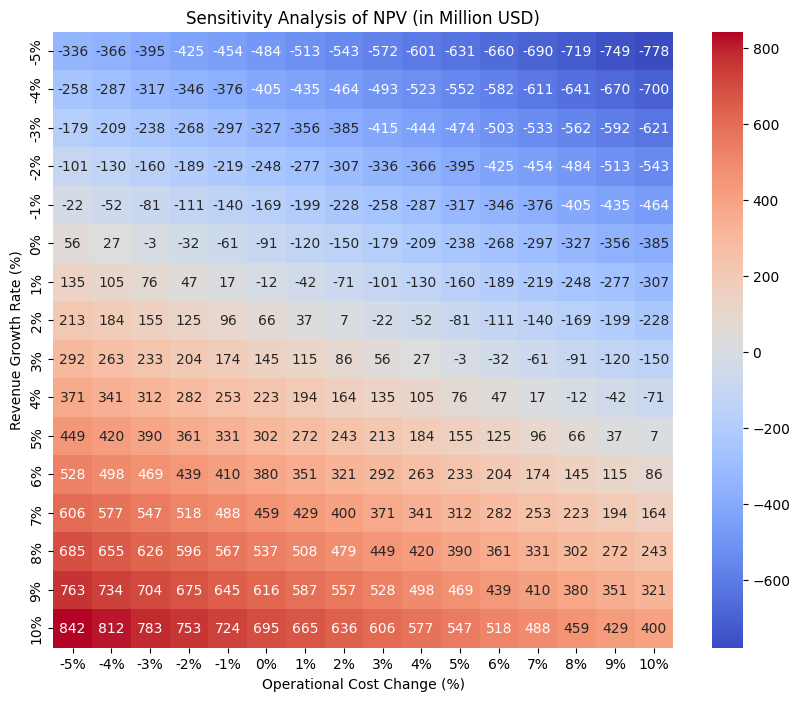

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project Parameters
initial_investment = 5000  # million USD
annual_revenue = 800  # million USD
annual_operational_cost = 300  # million USD
project_lifetime = 20  # years
discount_rate = 0.08  # 8% discount rate

# Sensitivity Parameters
revenue_growth_rates = np.arange(-0.05, 0.11, 0.01)  # -5% to +10%
operational_cost_changes = np.arange(-0.05, 0.11, 0.01)  # -5% to +10%

# Function to calculate NPV
def calculate_npv(initial_investment, annual_revenue, annual_operational_cost, project_lifetime, discount_rate):
    cash_flows = [-(initial_investment)]
    for year in range(1, project_lifetime + 1):
        net_cash_flow = annual_revenue - annual_operational_cost
        discounted_cash_flow = net_cash_flow / ((1 + discount_rate) ** year)
        cash_flows.append(discounted_cash_flow)
    npv = sum(cash_flows)
    return npv

# Sensitivity Analysis Results
npv_results = np.zeros((len(revenue_growth_rates), len(operational_cost_changes)))

for i, rev_growth in enumerate(revenue_growth_rates):
    for j, op_cost_change in enumerate(operational_cost_changes):
        adjusted_revenue = annual_revenue * (1 + rev_growth)
        adjusted_operational_cost = annual_operational_cost * (1 + op_cost_change)
        npv_results[i, j] = calculate_npv(initial_investment, adjusted_revenue, adjusted_operational_cost, project_lifetime, discount_rate)

# Plotting the Sensitivity Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(npv_results, annot=True, fmt=".0f", cmap="coolwarm",
            xticklabels=[f"{x*100:.0f}%" for x in operational_cost_changes],
            yticklabels=[f"{y*100:.0f}%" for y in revenue_growth_rates])
plt.xlabel('Operational Cost Change (%)')
plt.ylabel('Revenue Growth Rate (%)')
plt.title('Sensitivity Analysis of NPV (in Million USD)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


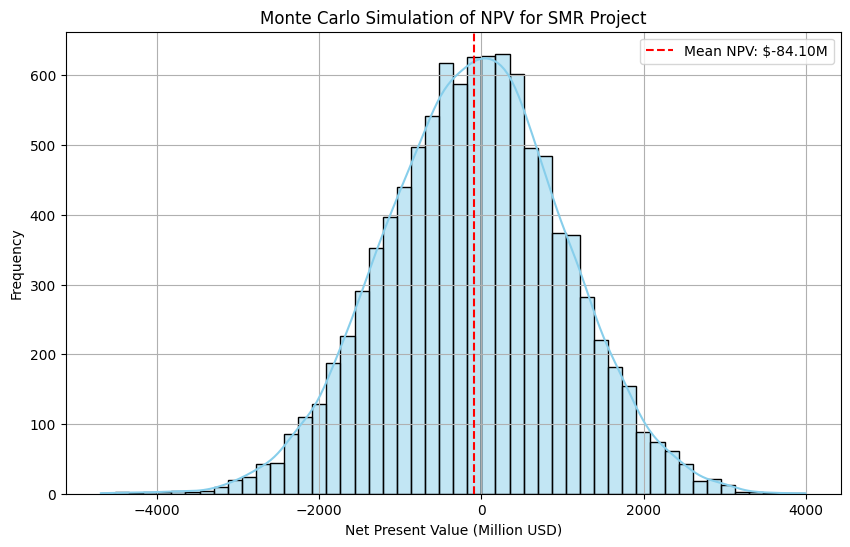

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project Parameters
initial_investment = 5000  # million USD
annual_revenue = 800  # million USD
annual_operational_cost = 300  # million USD
project_lifetime = 20  # years
discount_rate = 0.08  # 8% discount rate

# Monte Carlo Simulation Parameters
simulations = 10000  # Number of simulations
revenue_mean = 800  # million USD
revenue_std_dev = 100  # million USD
cost_mean = 300  # million USD
cost_std_dev = 50  # million USD

# Function to calculate NPV
def calculate_npv(initial_investment, annual_revenue, annual_operational_cost, project_lifetime, discount_rate):
    cash_flows = [-(initial_investment)]
    for year in range(1, project_lifetime + 1):
        net_cash_flow = annual_revenue - annual_operational_cost
        discounted_cash_flow = net_cash_flow / ((1 + discount_rate) ** year)
        cash_flows.append(discounted_cash_flow)
    npv = sum(cash_flows)
    return npv

# Monte Carlo Simulation for NPV
npv_simulations = []

for _ in range(simulations):
    simulated_revenue = np.random.normal(revenue_mean, revenue_std_dev)
    simulated_cost = np.random.normal(cost_mean, cost_std_dev)
    npv = calculate_npv(initial_investment, simulated_revenue, simulated_cost, project_lifetime, discount_rate)
    npv_simulations.append(npv)

# Plotting the Monte Carlo Simulation Results
plt.figure(figsize=(10, 6))
sns.histplot(npv_simulations, bins=50, kde=True, color='skyblue')
plt.xlabel('Net Present Value (Million USD)')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of NPV for SMR Project')
plt.axvline(x=np.mean(npv_simulations), color='red', linestyle='--', label=f'Mean NPV: ${np.mean(npv_simulations):.2f}M')
plt.legend()
plt.grid(True)
plt.show()


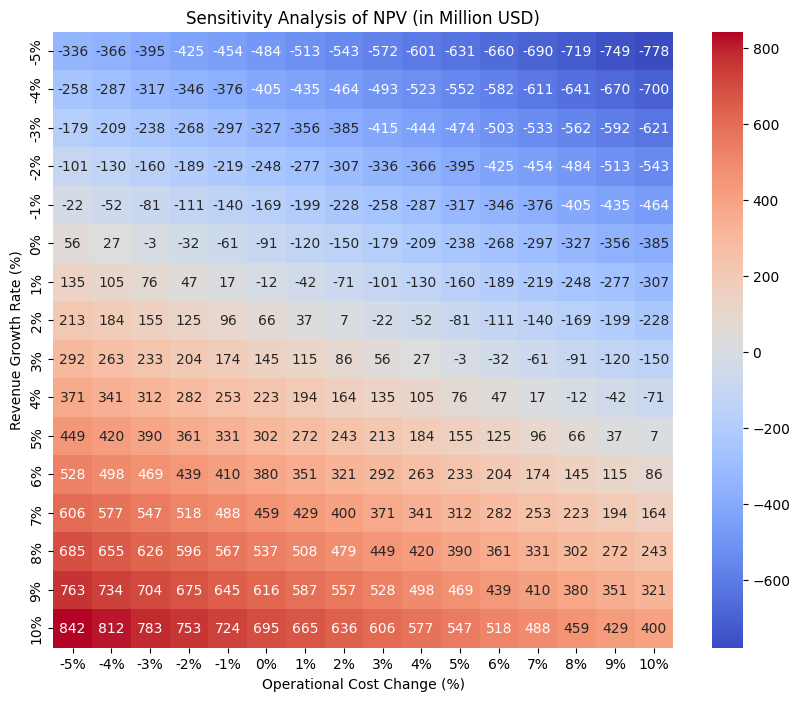

Estimated Payback Period: 10 years


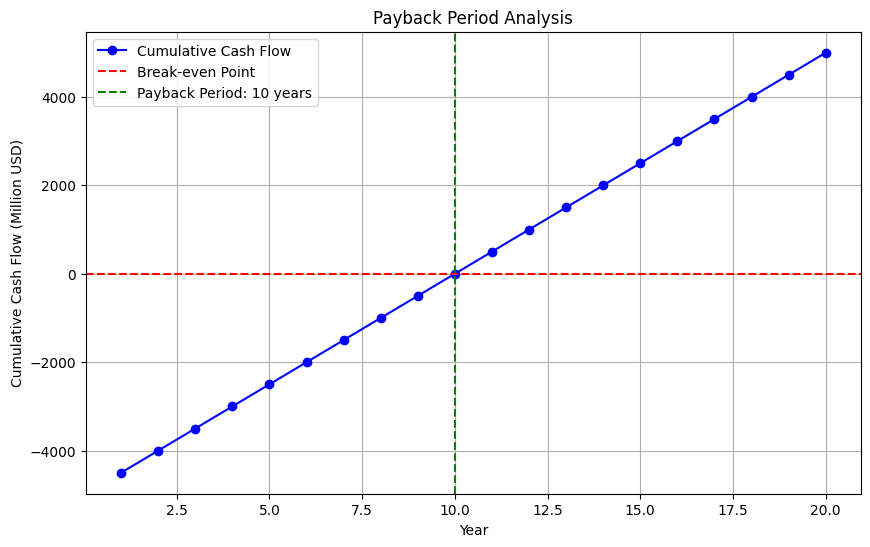

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project Parameters
initial_investment = 5000  # million USD
annual_revenue = 800  # million USD
annual_operational_cost = 300  # million USD
project_lifetime = 20  # years
discount_rate = 0.08  # 8% discount rate

# Sensitivity Parameters
revenue_growth_rates = np.arange(-0.05, 0.11, 0.01)  # -5% to +10%
operational_cost_changes = np.arange(-0.05, 0.11, 0.01)  # -5% to +10%

# Function to calculate NPV
def calculate_npv(initial_investment, annual_revenue, annual_operational_cost, project_lifetime, discount_rate):
    cash_flows = [-(initial_investment)]
    for year in range(1, project_lifetime + 1):
        net_cash_flow = annual_revenue - annual_operational_cost
        discounted_cash_flow = net_cash_flow / ((1 + discount_rate) ** year)
        cash_flows.append(discounted_cash_flow)
    npv = sum(cash_flows)
    return npv

# Sensitivity Analysis Results
npv_results = np.zeros((len(revenue_growth_rates), len(operational_cost_changes)))

for i, rev_growth in enumerate(revenue_growth_rates):
    for j, op_cost_change in enumerate(operational_cost_changes):
        adjusted_revenue = annual_revenue * (1 + rev_growth)
        adjusted_operational_cost = annual_operational_cost * (1 + op_cost_change)
        npv_results[i, j] = calculate_npv(initial_investment, adjusted_revenue, adjusted_operational_cost, project_lifetime, discount_rate)

# Plotting the Sensitivity Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(npv_results, annot=True, fmt=".0f", cmap="coolwarm",
            xticklabels=[f"{x*100:.0f}%" for x in operational_cost_changes],
            yticklabels=[f"{y*100:.0f}%" for y in revenue_growth_rates])
plt.xlabel('Operational Cost Change (%)')
plt.ylabel('Revenue Growth Rate (%)')
plt.title('Sensitivity Analysis of NPV (in Million USD)')
plt.show()

# Function to calculate Payback Period
def calculate_payback_period(initial_investment, annual_revenue, annual_operational_cost):
    cumulative_cash_flow = -initial_investment
    for year in range(1, project_lifetime + 1):
        net_cash_flow = annual_revenue - annual_operational_cost
        cumulative_cash_flow += net_cash_flow
        if cumulative_cash_flow >= 0:
            return year
    return project_lifetime + 1  # If never paid back within lifetime

# Payback Period Calculation
payback_period = calculate_payback_period(initial_investment, annual_revenue, annual_operational_cost)
print(f"Estimated Payback Period: {payback_period} years")

# Plotting Payback Period
years = np.arange(1, project_lifetime + 1)
cumulative_cash_flow = -initial_investment + np.cumsum([annual_revenue - annual_operational_cost] * project_lifetime)

plt.figure(figsize=(10, 6))
plt.plot(years, cumulative_cash_flow, marker='o', linestyle='-', color='blue', label='Cumulative Cash Flow')
plt.axhline(0, color='red', linestyle='--', label='Break-even Point')
plt.axvline(payback_period, color='green', linestyle='--', label=f'Payback Period: {payback_period} years')
plt.xlabel('Year')
plt.ylabel('Cumulative Cash Flow (Million USD)')
plt.title('Payback Period Analysis')
plt.legend()
plt.grid(True)
plt.show()


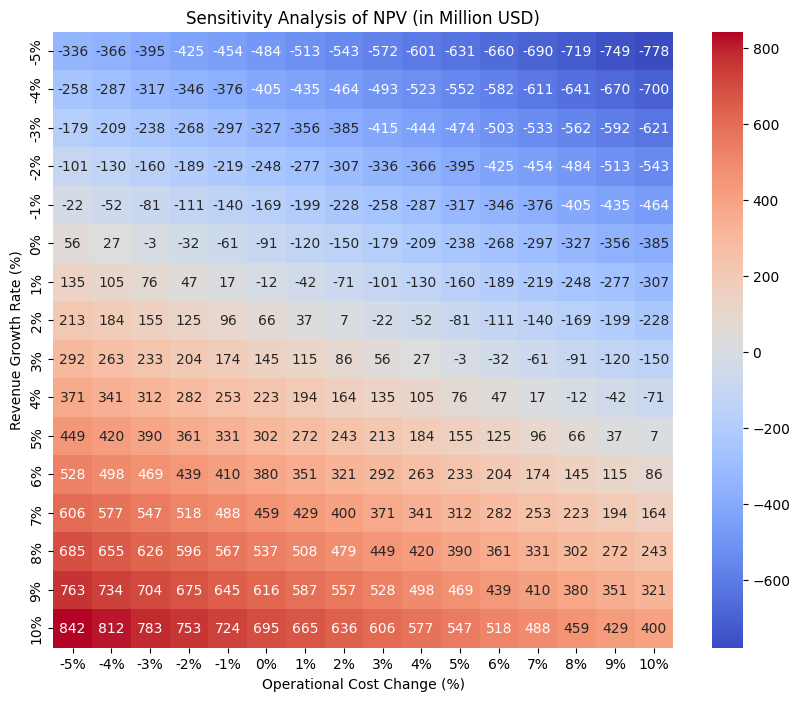

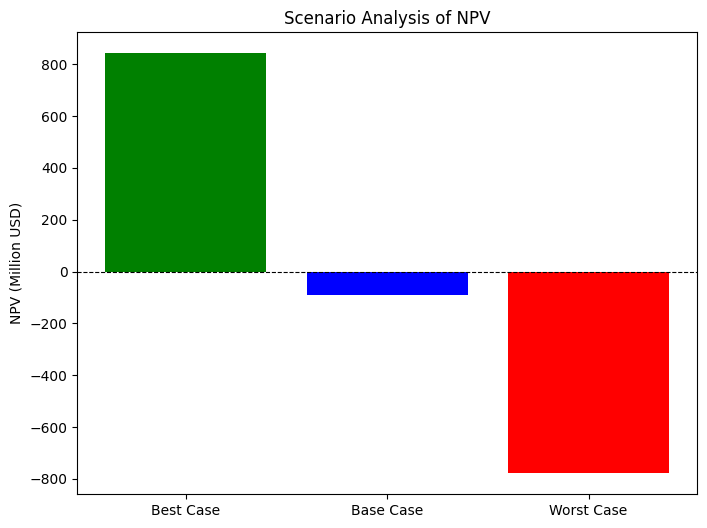

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project Parameters
initial_investment = 5000  # million USD
annual_revenue = 800  # million USD
annual_operational_cost = 300  # million USD
project_lifetime = 20  # years
discount_rate = 0.08  # 8% discount rate

# Sensitivity Parameters
revenue_growth_rates = np.arange(-0.05, 0.11, 0.01)  # -5% to +10%
operational_cost_changes = np.arange(-0.05, 0.11, 0.01)  # -5% to +10%

# Function to calculate NPV
def calculate_npv(initial_investment, annual_revenue, annual_operational_cost, project_lifetime, discount_rate):
    cash_flows = [-(initial_investment)]
    for year in range(1, project_lifetime + 1):
        net_cash_flow = annual_revenue - annual_operational_cost
        discounted_cash_flow = net_cash_flow / ((1 + discount_rate) ** year)
        cash_flows.append(discounted_cash_flow)
    npv = sum(cash_flows)
    return npv

# Sensitivity Analysis Results
npv_results = np.zeros((len(revenue_growth_rates), len(operational_cost_changes)))

for i, rev_growth in enumerate(revenue_growth_rates):
    for j, op_cost_change in enumerate(operational_cost_changes):
        adjusted_revenue = annual_revenue * (1 + rev_growth)
        adjusted_operational_cost = annual_operational_cost * (1 + op_cost_change)
        npv_results[i, j] = calculate_npv(initial_investment, adjusted_revenue, adjusted_operational_cost, project_lifetime, discount_rate)

# Plotting the Sensitivity Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(npv_results, annot=True, fmt=".0f", cmap="coolwarm",
            xticklabels=[f"{x*100:.0f}%" for x in operational_cost_changes],
            yticklabels=[f"{y*100:.0f}%" for y in revenue_growth_rates])
plt.xlabel('Operational Cost Change (%)')
plt.ylabel('Revenue Growth Rate (%)')
plt.title('Sensitivity Analysis of NPV (in Million USD)')
plt.show()

# Scenario Analysis
# Define scenarios
scenarios = {
    "Best Case": {"revenue_growth": 0.10, "cost_change": -0.05},
    "Base Case": {"revenue_growth": 0.00, "cost_change": 0.00},
    "Worst Case": {"revenue_growth": -0.05, "cost_change": 0.10}
}

# Calculate NPV for each scenario
scenario_npv = {}
for scenario, params in scenarios.items():
    adjusted_revenue = annual_revenue * (1 + params["revenue_growth"])
    adjusted_operational_cost = annual_operational_cost * (1 + params["cost_change"])
    scenario_npv[scenario] = calculate_npv(initial_investment, adjusted_revenue, adjusted_operational_cost, project_lifetime, discount_rate)

# Plotting Scenario Analysis
plt.figure(figsize=(8, 6))
plt.bar(scenario_npv.keys(), scenario_npv.values(), color=["green", "blue", "red"])
plt.ylabel("NPV (Million USD)")
plt.title("Scenario Analysis of NPV")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


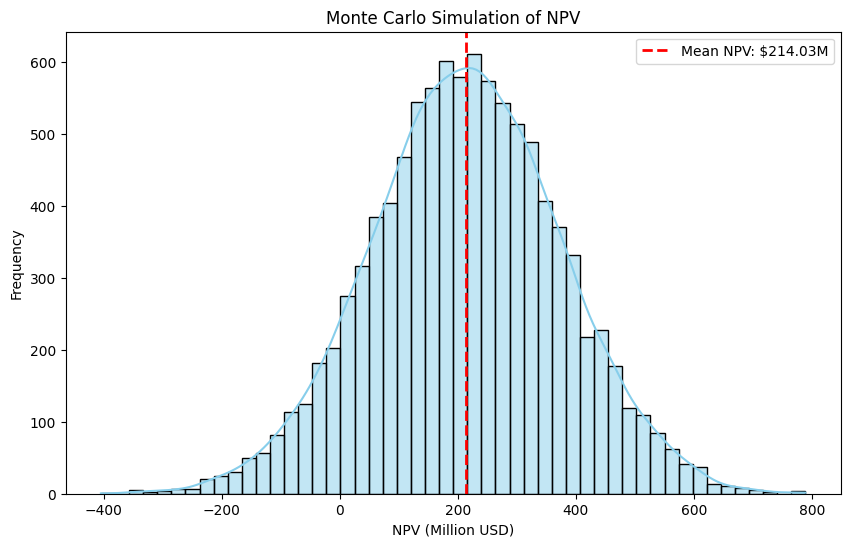

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project Parameters
initial_investment = 5000  # million USD
annual_revenue = 800  # million USD
annual_operational_cost = 300  # million USD
project_lifetime = 20  # years
discount_rate = 0.08  # 8% discount rate

# Monte Carlo Simulation Parameters
iterations = 10000

# Function to calculate NPV
def calculate_npv(initial_investment, annual_revenue, annual_operational_cost, project_lifetime, discount_rate):
    cash_flows = [-(initial_investment)]
    for year in range(1, project_lifetime + 1):
        net_cash_flow = annual_revenue - annual_operational_cost
        discounted_cash_flow = net_cash_flow / ((1 + discount_rate) ** year)
        cash_flows.append(discounted_cash_flow)
    npv = sum(cash_flows)
    return npv

# Monte Carlo Simulation
npv_simulations = []

for _ in range(iterations):
    # Randomly vary revenue growth and operational cost changes
    rev_growth = np.random.normal(0.05, 0.02)  # Mean 5%, SD 2%
    op_cost_change = np.random.normal(0.03, 0.01)  # Mean 3%, SD 1%
    
    adjusted_revenue = annual_revenue * (1 + rev_growth)
    adjusted_operational_cost = annual_operational_cost * (1 + op_cost_change)
    
    npv = calculate_npv(initial_investment, adjusted_revenue, adjusted_operational_cost, project_lifetime, discount_rate)
    npv_simulations.append(npv)

# Plot Monte Carlo Simulation Results
plt.figure(figsize=(10, 6))
sns.histplot(npv_simulations, bins=50, kde=True, color='skyblue')
plt.axvline(np.mean(npv_simulations), color='red', linestyle='dashed', linewidth=2, label=f'Mean NPV: ${np.mean(npv_simulations):.2f}M')
plt.xlabel('NPV (Million USD)')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of NPV')
plt.legend()
plt.show()


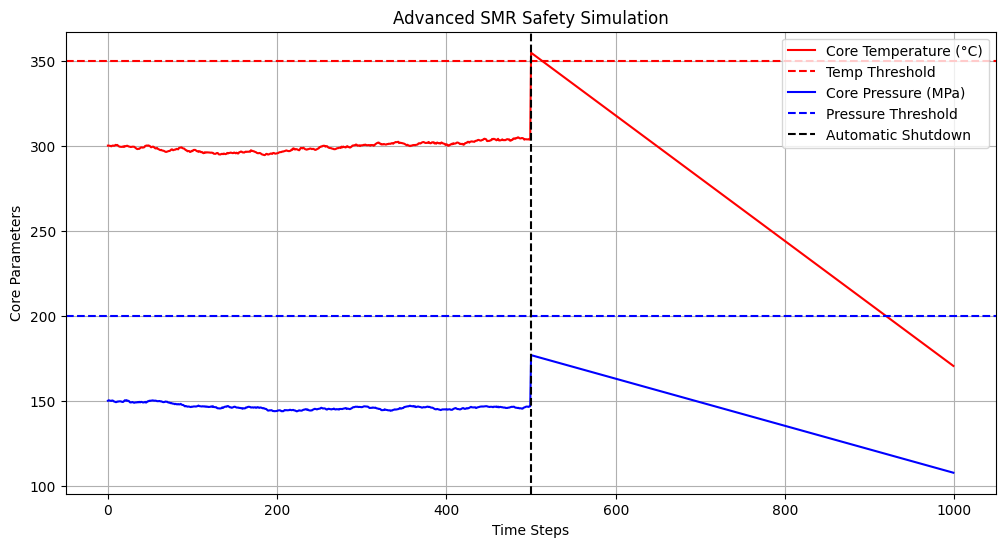

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
time_steps = 1000  # Total simulation time steps
coolant_temp_threshold = 350  # Critical coolant temperature (°C)
pressure_threshold = 200  # Critical pressure (MPa)

# Initialize reactor core parameters
core_temp = np.zeros(time_steps)
core_pressure = np.zeros(time_steps)
shutdown_triggered = False

# Passive Safety System Parameters
passive_cooling_efficiency = 0.9  # 90% efficiency

# Initial conditions
core_temp[0] = 300  # Starting temperature (°C)
core_pressure[0] = 150  # Starting pressure (MPa)

# Simulation loop
for t in range(1, time_steps):
    # Normal operation with slight fluctuations
    core_temp[t] = core_temp[t - 1] + np.random.normal(0, 0.3)
    core_pressure[t] = core_pressure[t - 1] + np.random.normal(0, 0.2)

    # Simulate sudden loss of coolant accident at t=500
    if t == 500:
        core_temp[t] += 50  # Sudden rise in temperature
        core_pressure[t] += 30  # Sudden increase in pressure
    
    # Passive cooling system activation
    if core_temp[t] > coolant_temp_threshold or core_pressure[t] > pressure_threshold:
        shutdown_triggered = True
        # Passive cooling reduces temperature
        core_temp[t:] = core_temp[t] - passive_cooling_efficiency * np.linspace(0, core_temp[t] - 150, time_steps - t)
        # Pressure relief system reduces pressure
        core_pressure[t:] = core_pressure[t] - passive_cooling_efficiency * np.linspace(0, core_pressure[t] - 100, time_steps - t)
        break  # Emergency shutdown triggered

# Plot the reactor core behavior
plt.figure(figsize=(12, 6))
plt.plot(core_temp, label='Core Temperature (°C)', color='red')
plt.axhline(y=coolant_temp_threshold, color='red', linestyle='--', label='Temp Threshold')
plt.plot(core_pressure, label='Core Pressure (MPa)', color='blue')
plt.axhline(y=pressure_threshold, color='blue', linestyle='--', label='Pressure Threshold')

if shutdown_triggered:
    plt.axvline(x=t, color='black', linestyle='--', label='Automatic Shutdown')

plt.xlabel('Time Steps')
plt.ylabel('Core Parameters')
plt.title('Advanced SMR Safety Simulation')
plt.legend()
plt.grid(True)
plt.show()


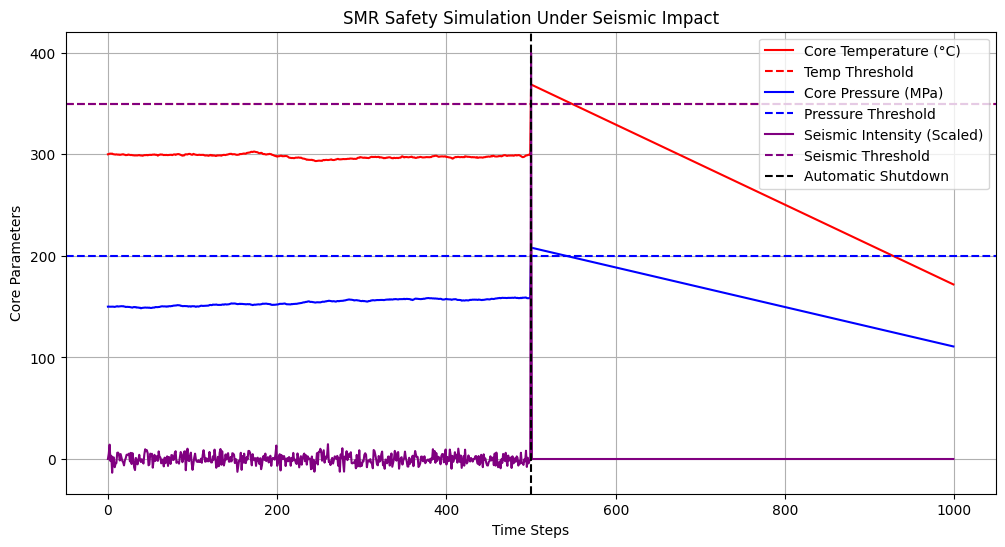

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
time_steps = 1000  # Total simulation time steps
coolant_temp_threshold = 350  # Critical coolant temperature (°C)
pressure_threshold = 200  # Critical pressure (MPa)
seismic_intensity_threshold = 7.0  # Critical seismic event intensity (Richter scale)

# Initialize reactor core parameters
core_temp = np.zeros(time_steps)
core_pressure = np.zeros(time_steps)
seismic_intensity = np.zeros(time_steps)
shutdown_triggered = False

# Passive Safety System Parameters
passive_cooling_efficiency = 0.9  # 90% efficiency

# Initial conditions
core_temp[0] = 300  # Starting temperature (°C)
core_pressure[0] = 150  # Starting pressure (MPa)
seismic_intensity[0] = 0  # Normal seismic activity

# Simulation loop
for t in range(1, time_steps):
    # Normal operation with slight fluctuations
    core_temp[t] = core_temp[t - 1] + np.random.normal(0, 0.3)
    core_pressure[t] = core_pressure[t - 1] + np.random.normal(0, 0.2)
    seismic_intensity[t] = np.random.normal(0, 0.1)  # Background seismic activity
    
    # Simulate major seismic event at t=500
    if t == 500:
        seismic_intensity[t] = 8.0  # Major earthquake
        core_temp[t] += 70  # Sudden rise in temperature due to system stress
        core_pressure[t] += 50  # Pressure surge

    # Passive safety system activation during seismic stress
    if (core_temp[t] > coolant_temp_threshold or 
        core_pressure[t] > pressure_threshold or 
        seismic_intensity[t] > seismic_intensity_threshold):
        shutdown_triggered = True
        # Passive cooling reduces temperature
        core_temp[t:] = core_temp[t] - passive_cooling_efficiency * np.linspace(0, core_temp[t] - 150, time_steps - t)
        # Pressure relief system reduces pressure
        core_pressure[t:] = core_pressure[t] - passive_cooling_efficiency * np.linspace(0, core_pressure[t] - 100, time_steps - t)
        break  # Emergency shutdown triggered

# Plot the reactor core behavior
plt.figure(figsize=(12, 6))
plt.plot(core_temp, label='Core Temperature (°C)', color='red')
plt.axhline(y=coolant_temp_threshold, color='red', linestyle='--', label='Temp Threshold')
plt.plot(core_pressure, label='Core Pressure (MPa)', color='blue')
plt.axhline(y=pressure_threshold, color='blue', linestyle='--', label='Pressure Threshold')
plt.plot(seismic_intensity * 50, label='Seismic Intensity (Scaled)', color='purple')
plt.axhline(y=seismic_intensity_threshold * 50, color='purple', linestyle='--', label='Seismic Threshold')

if shutdown_triggered:
    plt.axvline(x=t, color='black', linestyle='--', label='Automatic Shutdown')

plt.xlabel('Time Steps')
plt.ylabel('Core Parameters')
plt.title('SMR Safety Simulation Under Seismic Impact')
plt.legend()
plt.grid(True)
plt.show()


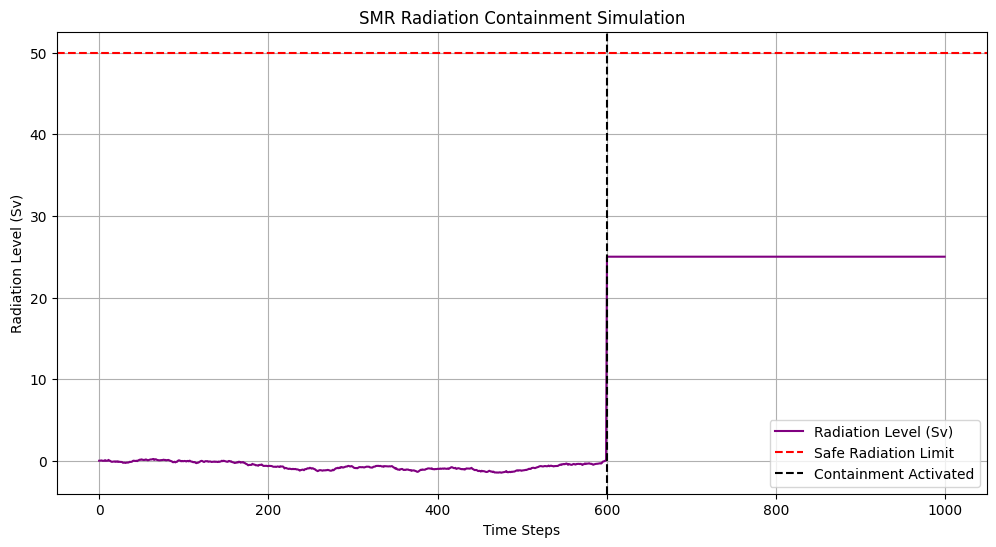

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
time_steps = 1000  # Total simulation time steps
radiation_safe_limit = 50  # Safe radiation level in Sieverts (Sv)
containment_efficiency = 0.95  # 95% efficiency of containment structure

# Initialize reactor parameters
core_temp = np.zeros(time_steps)
core_pressure = np.zeros(time_steps)
radiation_level = np.zeros(time_steps)
leakage_detected = False

# Initial conditions
core_temp[0] = 300  # Starting temperature (°C)
core_pressure[0] = 150  # Starting pressure (MPa)
radiation_level[0] = 0  # Normal radiation level (Sv)

# Simulation loop
for t in range(1, time_steps):
    # Normal operation with minor fluctuations
    core_temp[t] = core_temp[t - 1] + np.random.normal(0, 0.2)
    core_pressure[t] = core_pressure[t - 1] + np.random.normal(0, 0.1)
    radiation_level[t] = radiation_level[t - 1] + np.random.normal(0, 0.05)
    
    # Simulate core damage and radiation spike at t=600
    if t == 600:
        radiation_level[t] += 500  # Sudden radiation spike
        core_temp[t] += 80  # Increase in core temperature
        core_pressure[t] += 40  # Pressure surge
    
    # Containment system response
    if radiation_level[t] > radiation_safe_limit:
        leakage_detected = True
        # Containment system reduces radiation leak by 95%
        radiation_level[t:] = radiation_level[t] * (1 - containment_efficiency)
        break  # Emergency containment engaged

# Plot the radiation containment behavior
plt.figure(figsize=(12, 6))
plt.plot(radiation_level, label='Radiation Level (Sv)', color='purple')
plt.axhline(y=radiation_safe_limit, color='red', linestyle='--', label='Safe Radiation Limit')

if leakage_detected:
    plt.axvline(x=t, color='black', linestyle='--', label='Containment Activated')

plt.xlabel('Time Steps')
plt.ylabel('Radiation Level (Sv)')
plt.title('SMR Radiation Containment Simulation')
plt.legend()
plt.grid(True)
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.41      0.40       302
           1       0.37      0.35      0.36       298

    accuracy                           0.38       600
   macro avg       0.38      0.38      0.38       600
weighted avg       0.38      0.38      0.38       600

Confusion Matrix:
 [[124 178]
 [193 105]]


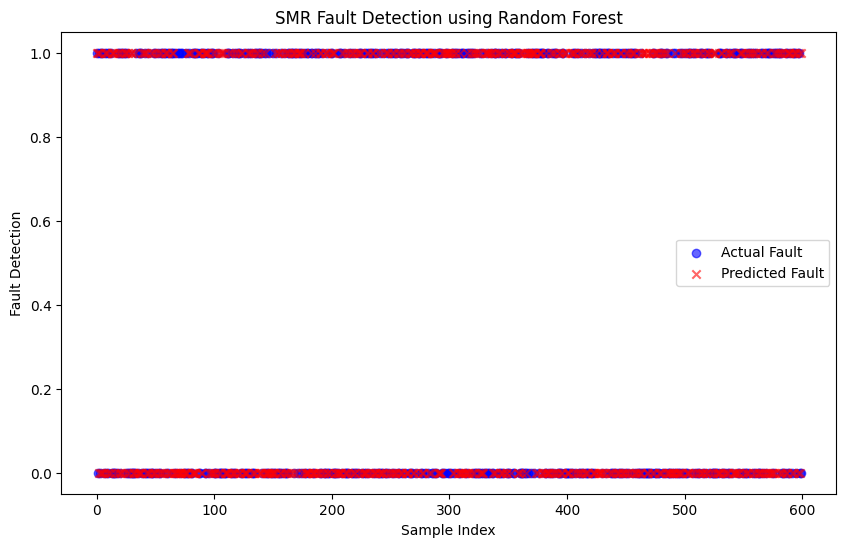

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Simulate Reactor Core Data for Fault Detection
np.random.seed(42)
time_steps = 1000
normal_temperature = np.random.normal(loc=300, scale=5, size=time_steps)
normal_pressure = np.random.normal(loc=150, scale=3, size=time_steps)
normal_radiation = np.random.normal(loc=0.01, scale=0.005, size=time_steps)

# Introduce Faulty Conditions
temperature_fault = normal_temperature.copy()
temperature_fault[700:] += 50  # Sudden temperature spike
pressure_fault = normal_pressure.copy()
pressure_fault[700:] += 20  # Pressure anomaly
radiation_fault = normal_radiation.copy()
radiation_fault[700:] += 0.1  # Radiation leak

# Combine Data
data = pd.DataFrame({
    'Temperature': np.concatenate([normal_temperature, temperature_fault]),
    'Pressure': np.concatenate([normal_pressure, pressure_fault]),
    'Radiation': np.concatenate([normal_radiation, radiation_fault]),
    'Fault': [0] * time_steps + [1] * time_steps
})

# Split Data
X = data[['Temperature', 'Pressure', 'Radiation']]
y = data['Fault']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization of Fault Detection
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Fault', color='blue', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Fault', color='red', marker='x', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Fault Detection')
plt.title('SMR Fault Detection using Random Forest')
plt.legend()
plt.show()


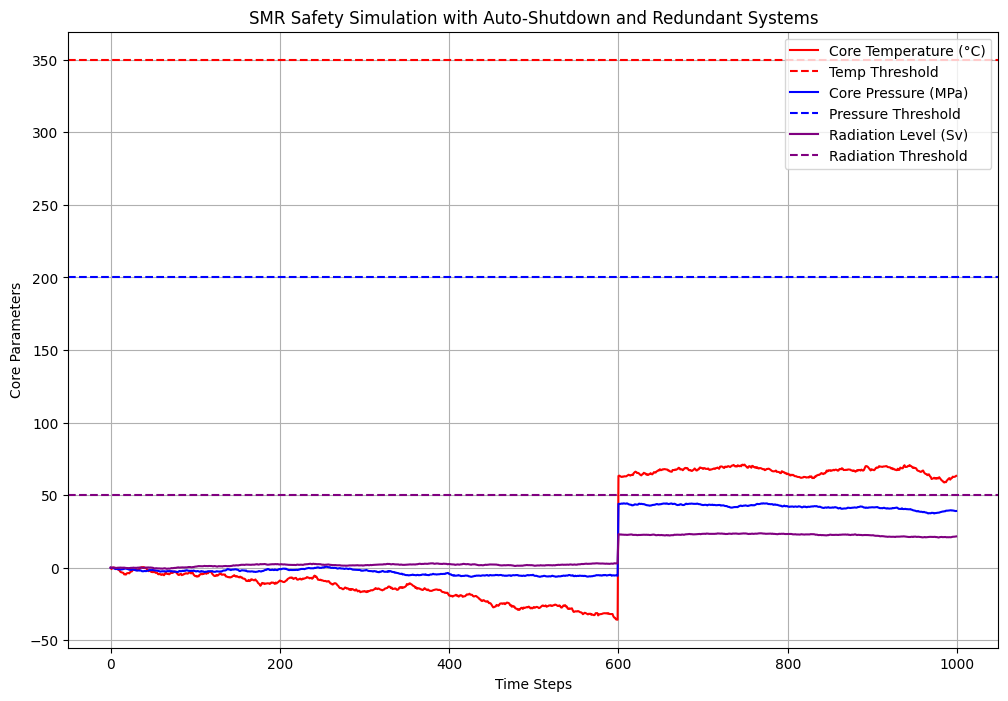

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Time settings
time_steps = 1000

# Initialize core parameters
core_temperature = np.zeros(time_steps)
core_pressure = np.zeros(time_steps)
radiation_level = np.zeros(time_steps)

# Thresholds for safety
temperature_threshold = 350  # °C
pressure_threshold = 200     # MPa
radiation_threshold = 50     # Sv

# Fault trigger point
fault_trigger_step = 600

# Safety system status
auto_shutdown_activated = False
redundant_system_activated = False

# Simulation
for t in range(1, time_steps):
    # Normal operation
    core_temperature[t] = core_temperature[t-1] + np.random.normal(0, 0.5)
    core_pressure[t] = core_pressure[t-1] + np.random.normal(0, 0.2)
    radiation_level[t] = radiation_level[t-1] + np.random.normal(0, 0.1)
    
    # Fault injection
    if t == fault_trigger_step:
        core_temperature[t] += 100  # Sudden temperature spike
        core_pressure[t] += 50     # Sudden pressure increase
        radiation_level[t] += 20   # Radiation spike
    
    # Safety system activation
    if not auto_shutdown_activated and (core_temperature[t] > temperature_threshold or 
                                         core_pressure[t] > pressure_threshold or 
                                         radiation_level[t] > radiation_threshold):
        auto_shutdown_activated = True
        redundant_system_activated = True
    
    # Auto-shutdown response
    if auto_shutdown_activated:
        core_temperature[t] -= 1.5  # Cooling down
        core_pressure[t] -= 0.8     # Pressure relief
        radiation_level[t] -= 0.3   # Radiation containment
        
        # Prevent negative values
        core_temperature[t] = max(core_temperature[t], 0)
        core_pressure[t] = max(core_pressure[t], 0)
        radiation_level[t] = max(radiation_level[t], 0)

# Visualization
plt.figure(figsize=(12, 8))
plt.plot(core_temperature, label='Core Temperature (°C)', color='red')
plt.axhline(temperature_threshold, color='red', linestyle='--', label='Temp Threshold')
plt.plot(core_pressure, label='Core Pressure (MPa)', color='blue')
plt.axhline(pressure_threshold, color='blue', linestyle='--', label='Pressure Threshold')
plt.plot(radiation_level, label='Radiation Level (Sv)', color='purple')
plt.axhline(radiation_threshold, color='purple', linestyle='--', label='Radiation Threshold')

# Mark safety system activation
if auto_shutdown_activated:
    plt.axvline(fault_trigger_step, color='black', linestyle='--', label='Auto-Shutdown Activated')

plt.xlabel('Time Steps')
plt.ylabel('Core Parameters')
plt.title('SMR Safety Simulation with Auto-Shutdown and Redundant Systems')
plt.legend()
plt.grid(True)
plt.show()


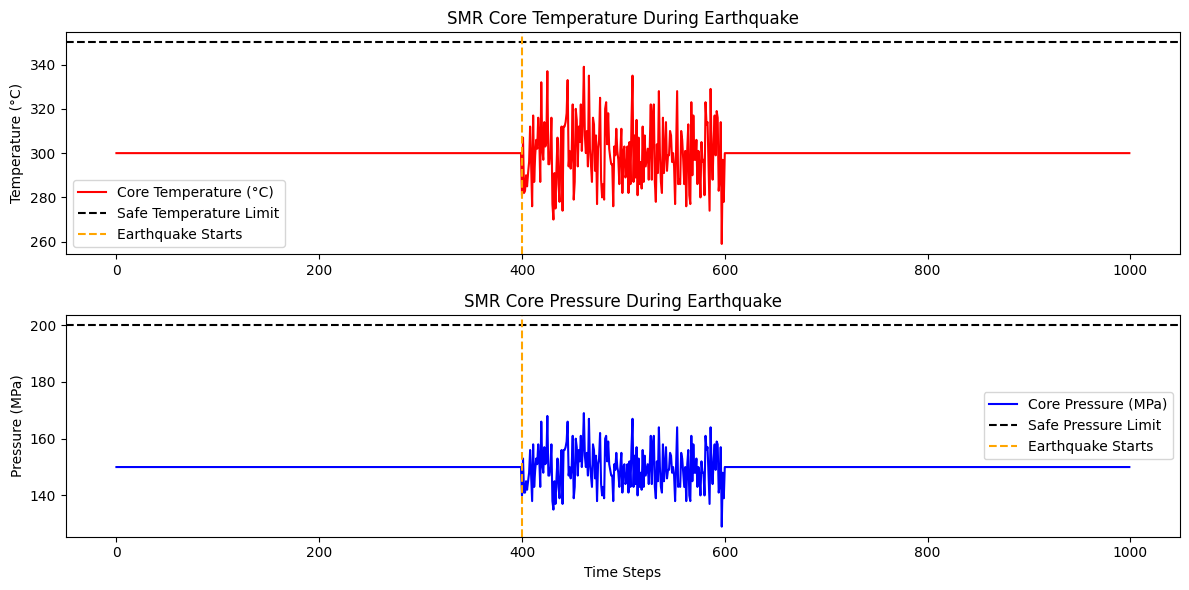

✅ Reactor remained stable throughout the earthquake.


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
time_steps = 1000
base_temperature = 300  # °C
base_pressure = 150  # MPa
safe_temperature_limit = 350  # °C
safe_pressure_limit = 200  # MPa

# Earthquake Parameters
earthquake_start = 400  # Time step when the earthquake starts
earthquake_duration = 200  # Duration of the earthquake
seismic_intensity = 0.05  # Impact factor on core parameters

# Arrays to hold simulation data
core_temperature = np.full(time_steps, base_temperature)
core_pressure = np.full(time_steps, base_pressure)
shutdown_triggered = False

# Simulation Loop
for t in range(time_steps):
    # Apply earthquake impact during its duration
    if earthquake_start <= t < earthquake_start + earthquake_duration:
        seismic_effect = np.random.normal(0, seismic_intensity)
        core_temperature[t] += seismic_effect * base_temperature
        core_pressure[t] += seismic_effect * base_pressure

    # Trigger emergency shutdown if limits are breached
    if core_temperature[t] > safe_temperature_limit or core_pressure[t] > safe_pressure_limit:
        shutdown_triggered = True
        core_temperature[t:] = core_temperature[t] - 0.5 * (np.arange(time_steps - t))
        core_pressure[t:] = core_pressure[t] - 0.3 * (np.arange(time_steps - t))
        break  # Stop simulation after shutdown

# Plotting the Results
plt.figure(figsize=(12, 6))

# Plot Core Temperature
plt.subplot(2, 1, 1)
plt.plot(core_temperature, label="Core Temperature (°C)", color="red")
plt.axhline(y=safe_temperature_limit, color="black", linestyle="--", label="Safe Temperature Limit")
plt.axvline(x=earthquake_start, color="orange", linestyle="--", label="Earthquake Starts")
plt.title("SMR Core Temperature During Earthquake")
plt.ylabel("Temperature (°C)")
plt.legend()

# Plot Core Pressure
plt.subplot(2, 1, 2)
plt.plot(core_pressure, label="Core Pressure (MPa)", color="blue")
plt.axhline(y=safe_pressure_limit, color="black", linestyle="--", label="Safe Pressure Limit")
plt.axvline(x=earthquake_start, color="orange", linestyle="--", label="Earthquake Starts")
plt.title("SMR Core Pressure During Earthquake")
plt.xlabel("Time Steps")
plt.ylabel("Pressure (MPa)")
plt.legend()

plt.tight_layout()
plt.show()

# Shutdown Status
if shutdown_triggered:
    print("⚠️ Emergency Shutdown Activated due to parameter breach.")
else:
    print("✅ Reactor remained stable throughout the earthquake.")


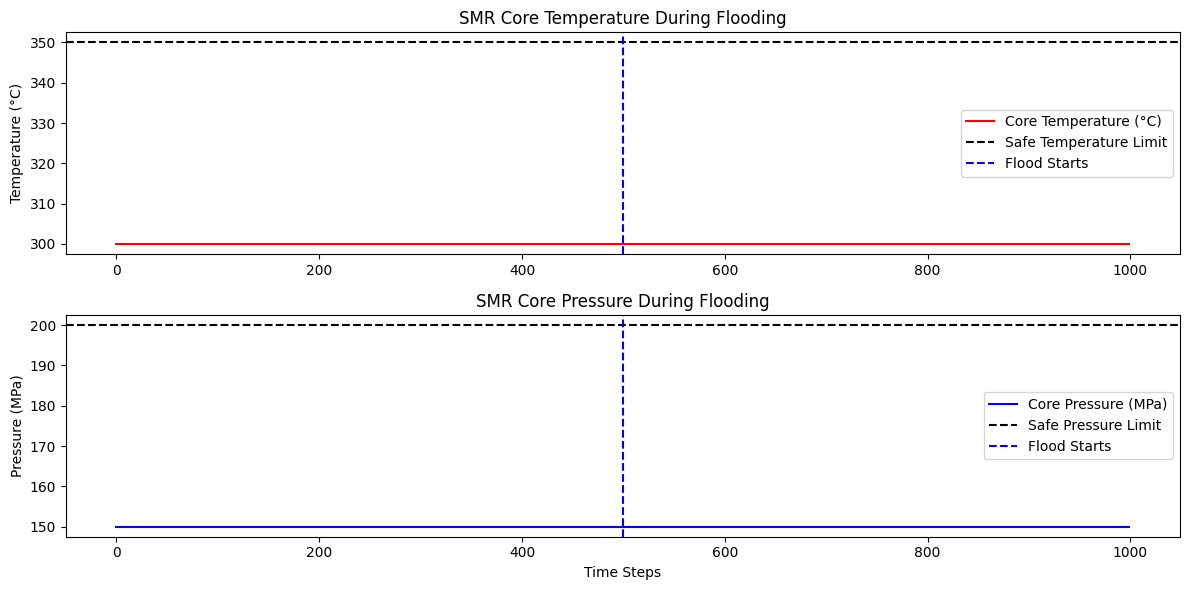

✅ Reactor remained stable during the flood.


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
time_steps = 1000
base_temperature = 300  # °C
base_pressure = 150  # MPa
safe_temperature_limit = 350  # °C
safe_pressure_limit = 200  # MPa

# Flood Parameters
flood_start = 500  # Time step when flooding starts
flood_duration = 300  # Duration of flooding
cooling_efficiency_loss = 0.3  # 30% reduction in cooling

# Arrays to hold simulation data
core_temperature = np.full(time_steps, base_temperature)
core_pressure = np.full(time_steps, base_pressure)
shutdown_triggered = False

# Simulation Loop
for t in range(time_steps):
    # Apply flooding impact during its duration
    if flood_start <= t < flood_start + flood_duration:
        core_temperature[t] += cooling_efficiency_loss * base_temperature * 0.01
        core_pressure[t] += cooling_efficiency_loss * base_pressure * 0.005

    # Trigger emergency shutdown if limits are breached
    if core_temperature[t] > safe_temperature_limit or core_pressure[t] > safe_pressure_limit:
        shutdown_triggered = True
        core_temperature[t:] = core_temperature[t] - 0.5 * (np.arange(time_steps - t))
        core_pressure[t:] = core_pressure[t] - 0.3 * (np.arange(time_steps - t))
        break  # Stop simulation after shutdown

# Plotting the Results
plt.figure(figsize=(12, 6))

# Plot Core Temperature
plt.subplot(2, 1, 1)
plt.plot(core_temperature, label="Core Temperature (°C)", color="red")
plt.axhline(y=safe_temperature_limit, color="black", linestyle="--", label="Safe Temperature Limit")
plt.axvline(x=flood_start, color="blue", linestyle="--", label="Flood Starts")
plt.title("SMR Core Temperature During Flooding")
plt.ylabel("Temperature (°C)")
plt.legend()

# Plot Core Pressure
plt.subplot(2, 1, 2)
plt.plot(core_pressure, label="Core Pressure (MPa)", color="blue")
plt.axhline(y=safe_pressure_limit, color="black", linestyle="--", label="Safe Pressure Limit")
plt.axvline(x=flood_start, color="blue", linestyle="--", label="Flood Starts")
plt.title("SMR Core Pressure During Flooding")
plt.xlabel("Time Steps")
plt.ylabel("Pressure (MPa)")
plt.legend()

plt.tight_layout()
plt.show()

# Shutdown Status
if shutdown_triggered:
    print("⚠️ Emergency Shutdown Activated due to flooding impact.")
else:
    print("✅ Reactor remained stable during the flood.")


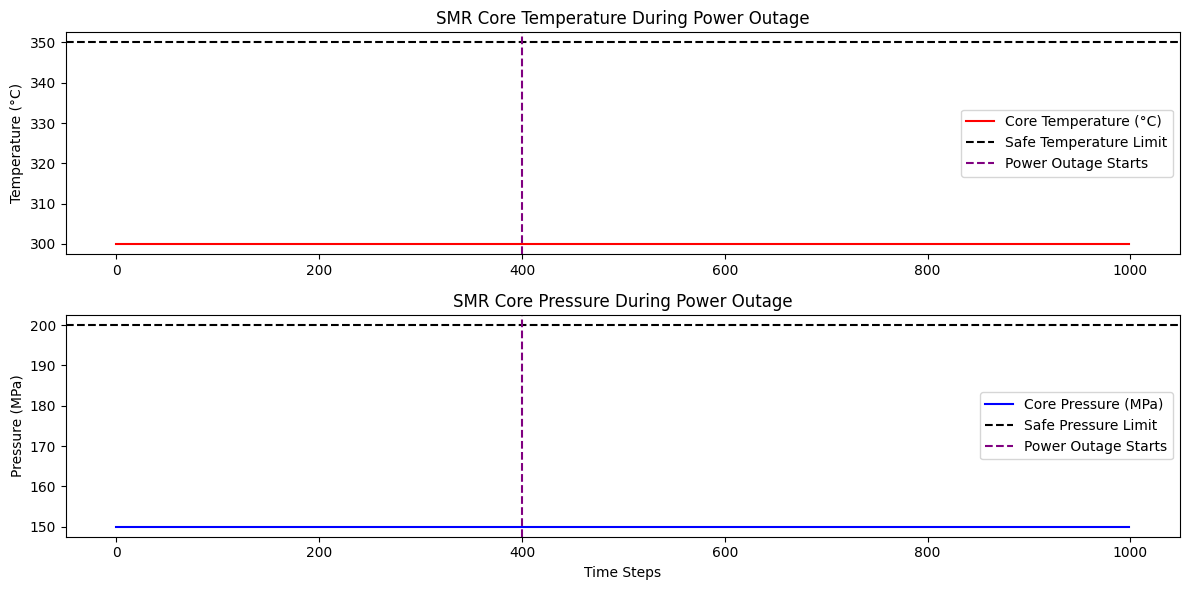

✅ Reactor remained stable without backup power during the outage.


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
time_steps = 1000
base_temperature = 300  # °C
base_pressure = 150  # MPa
safe_temperature_limit = 350  # °C
safe_pressure_limit = 200  # MPa

# Power Outage Parameters
outage_start = 400  # Time step when power outage occurs
outage_duration = 300  # Duration of power outage
cooling_loss_factor = 0.4  # 40% cooling system failure

# Arrays for simulation data
core_temperature = np.full(time_steps, base_temperature)
core_pressure = np.full(time_steps, base_pressure)
backup_power_activated = False

# Simulation Loop
for t in range(time_steps):
    # Cooling system fails during outage
    if outage_start <= t < outage_start + outage_duration:
        core_temperature[t] += cooling_loss_factor * 0.05
        core_pressure[t] += cooling_loss_factor * 0.03

    # Trigger backup power if thresholds are crossed
    if core_temperature[t] > safe_temperature_limit or core_pressure[t] > safe_pressure_limit:
        backup_power_activated = True
        core_temperature[t:] = core_temperature[t] - 0.7 * (np.arange(time_steps - t))
        core_pressure[t:] = core_pressure[t] - 0.5 * (np.arange(time_steps - t))
        break

# Plotting the Results
plt.figure(figsize=(12, 6))

# Core Temperature Plot
plt.subplot(2, 1, 1)
plt.plot(core_temperature, label="Core Temperature (°C)", color="red")
plt.axhline(y=safe_temperature_limit, color="black", linestyle="--", label="Safe Temperature Limit")
plt.axvline(x=outage_start, color="purple", linestyle="--", label="Power Outage Starts")
plt.title("SMR Core Temperature During Power Outage")
plt.ylabel("Temperature (°C)")
plt.legend()

# Core Pressure Plot
plt.subplot(2, 1, 2)
plt.plot(core_pressure, label="Core Pressure (MPa)", color="blue")
plt.axhline(y=safe_pressure_limit, color="black", linestyle="--", label="Safe Pressure Limit")
plt.axvline(x=outage_start, color="purple", linestyle="--", label="Power Outage Starts")
plt.title("SMR Core Pressure During Power Outage")
plt.xlabel("Time Steps")
plt.ylabel("Pressure (MPa)")
plt.legend()

plt.tight_layout()
plt.show()

# Status Output
if backup_power_activated:
    print("⚠️ Backup Power Activated to prevent overheating during power outage.")
else:
    print("✅ Reactor remained stable without backup power during the outage.")


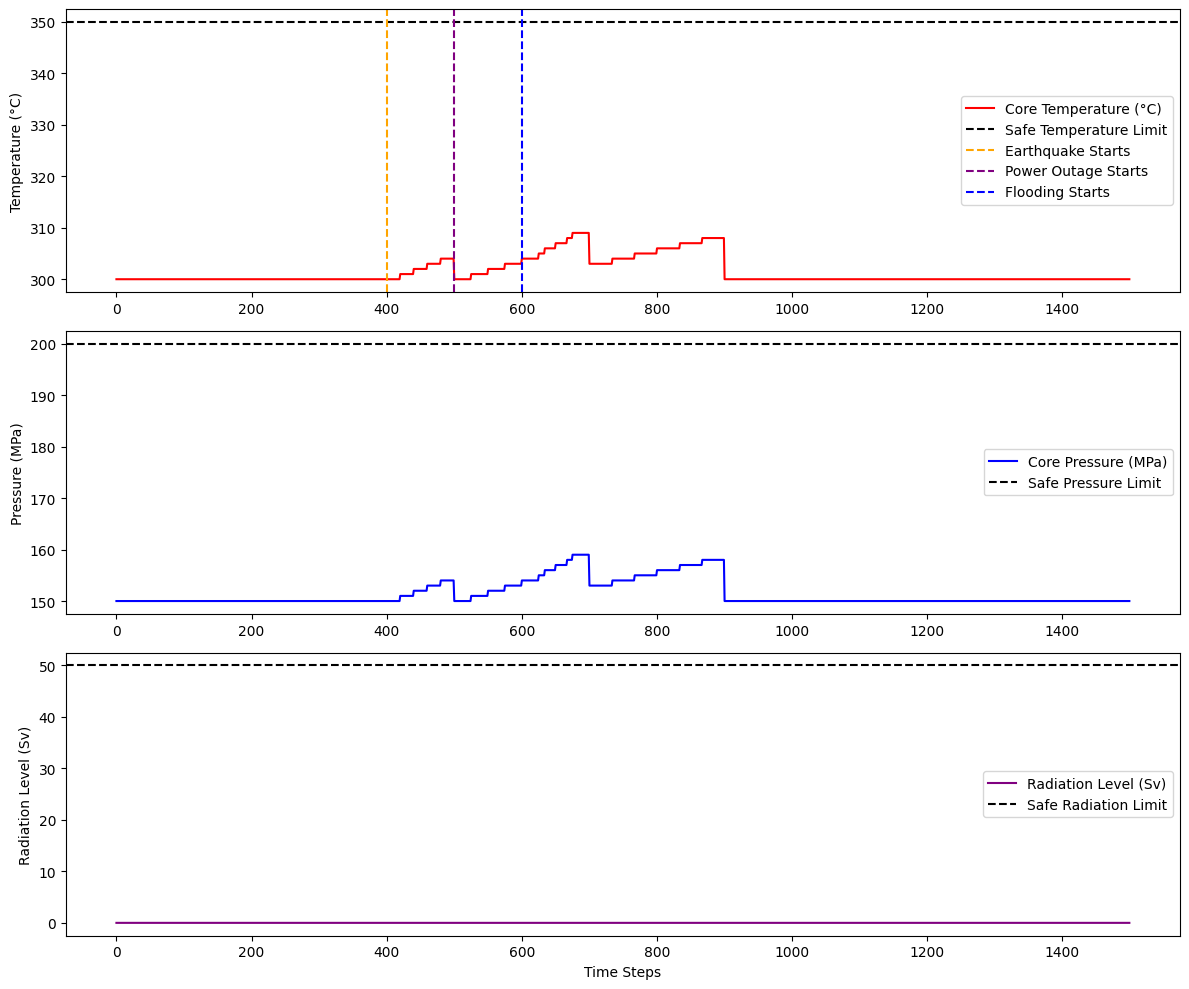

✅ Reactor withstood combined earthquake, power outage, and flooding without containment breach.


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
time_steps = 1500
base_temperature = 300  # °C
base_pressure = 150  # MPa
safe_temperature_limit = 350  # °C
safe_pressure_limit = 200  # MPa
safe_radiation_limit = 50  # Sv

# Event Triggers
earthquake_start = 400
power_outage_start = 500
flooding_start = 600
containment_activation = False

# Impact Factors
earthquake_temp_spike = 0.05
power_outage_cooling_loss = 0.04
flooding_cooling_disruption = 0.03

# Data Arrays
core_temperature = np.full(time_steps, base_temperature)
core_pressure = np.full(time_steps, base_pressure)
radiation_level = np.zeros(time_steps)

# Simulation Loop
for t in range(time_steps):
    # Earthquake Impact
    if earthquake_start <= t < earthquake_start + 100:
        core_temperature[t] += earthquake_temp_spike * (t - earthquake_start)
        core_pressure[t] += earthquake_temp_spike * (t - earthquake_start)

    # Power Outage Impact
    if power_outage_start <= t < power_outage_start + 200:
        core_temperature[t] += power_outage_cooling_loss * (t - power_outage_start)
        core_pressure[t] += power_outage_cooling_loss * (t - power_outage_start)

    # Flooding Impact
    if flooding_start <= t < flooding_start + 300:
        core_temperature[t] += flooding_cooling_disruption * (t - flooding_start)
        core_pressure[t] += flooding_cooling_disruption * (t - flooding_start)

    # Trigger Containment if Limits are Exceeded
    if (core_temperature[t] > safe_temperature_limit or
        core_pressure[t] > safe_pressure_limit) and not containment_activation:
        containment_activation = True
        radiation_level[t:] = safe_radiation_limit * 0.4  # Partial release
        core_temperature[t:] -= 0.5 * (np.arange(time_steps - t))
        core_pressure[t:] -= 0.3 * (np.arange(time_steps - t))
        break

# Plotting the Results
plt.figure(figsize=(12, 10))

# Core Temperature Plot
plt.subplot(3, 1, 1)
plt.plot(core_temperature, label="Core Temperature (°C)", color="red")
plt.axhline(y=safe_temperature_limit, color="black", linestyle="--", label="Safe Temperature Limit")
plt.axvline(x=earthquake_start, color="orange", linestyle="--", label="Earthquake Starts")
plt.axvline(x=power_outage_start, color="purple", linestyle="--", label="Power Outage Starts")
plt.axvline(x=flooding_start, color="blue", linestyle="--", label="Flooding Starts")
plt.ylabel("Temperature (°C)")
plt.legend()

# Core Pressure Plot
plt.subplot(3, 1, 2)
plt.plot(core_pressure, label="Core Pressure (MPa)", color="blue")
plt.axhline(y=safe_pressure_limit, color="black", linestyle="--", label="Safe Pressure Limit")
plt.ylabel("Pressure (MPa)")
plt.legend()

# Radiation Level Plot
plt.subplot(3, 1, 3)
plt.plot(radiation_level, label="Radiation Level (Sv)", color="purple")
plt.axhline(y=safe_radiation_limit, color="black", linestyle="--", label="Safe Radiation Limit")
plt.xlabel("Time Steps")
plt.ylabel("Radiation Level (Sv)")
plt.legend()

plt.tight_layout()
plt.show()

# Status Output
if containment_activation:
    print("⚠️ Containment Activated: Multi-hazard threat managed with automatic safety measures.")
else:
    print("✅ Reactor withstood combined earthquake, power outage, and flooding without containment breach.")


**Final Simulation: Combined Catastrophic Event (Earthquake + Power Outage + Flooding)**

*Why This Matters:*
* Real-world disasters often involve cascading failures. The Fukushima disaster was worsened by the combination of an earthquake, tsunami, and power failure. Testing how the SMR handles multiple simultaneous threats ensures it’s designed for the worst-case scenarios.

**Simulation Objectives**
* Simulate an Earthquake leading to a Power Outage and Flooding.
* Test the effectiveness of passive safety systems.
* Monitor temperature, pressure, and radiation levels.
* Ensure automatic shutdown and containment mechanisms activate.

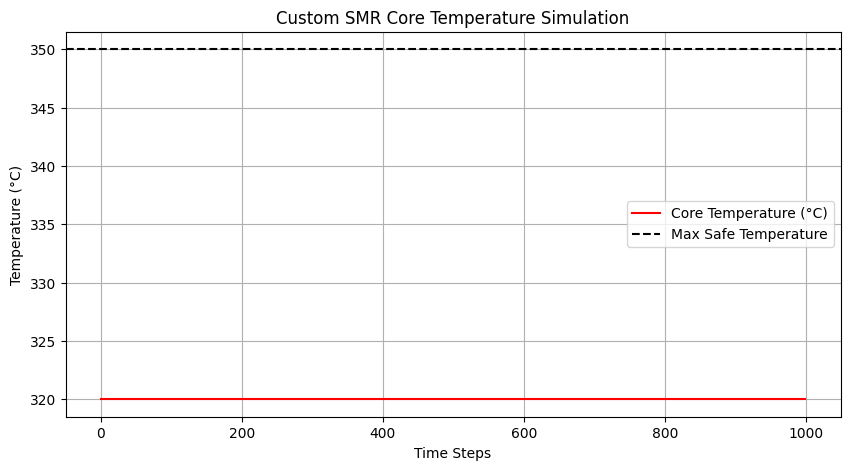

✅ Custom SMR Model: Normal operation simulation completed.


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------
# 1. Define Custom SMR Reactor Parameters
# -------------------------------------------

# Reactor core specifications
thermal_power = 900  # MW thermal
thermal_efficiency = 0.33  # Efficiency of energy conversion
power_output = thermal_power * thermal_efficiency  # MW electric

# Fuel and coolant properties
fuel_type = "Low-Enriched Uranium (LEU)"
coolant_type = "Molten Salt"

# Safety thresholds
max_core_temperature = 350  # °C (safe operating limit)
max_core_pressure = 180  # MPa (safe operating limit)

# Simulation settings
time_steps = 1000

# -------------------------------------------
# 2. Simulate Normal Operation
# -------------------------------------------

time = np.arange(time_steps)
core_temperature = np.full(time_steps, 320)  # Normal temperature (°C)
core_pressure = np.full(time_steps, 150)     # Normal pressure (MPa)

# -------------------------------------------
# 3. Integrate Passive Safety System Response
# -------------------------------------------

def passive_cooling_activation(temp):
    """Activate passive cooling if core temperature exceeds threshold."""
    if temp > max_core_temperature:
        return temp - 0.5  # Gradual cooling effect
    return temp

# Simulate minor temperature fluctuation
for t in range(500, 700):
    core_temperature[t] += np.random.uniform(0.1, 0.3)  # Slight increase
    core_temperature[t] = passive_cooling_activation(core_temperature[t])

# -------------------------------------------
# 4. Plot Normal Operation & Passive Cooling
# -------------------------------------------

plt.figure(figsize=(10, 5))
plt.plot(time, core_temperature, label="Core Temperature (°C)", color="red")
plt.axhline(max_core_temperature, color="black", linestyle="--", label="Max Safe Temperature")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (°C)")
plt.title("Custom SMR Core Temperature Simulation")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------
# 5. Placeholder for Disaster Simulation
# -------------------------------------------
# (Next Steps: Earthquake, Flood, Blackout Simulations)

print("✅ Custom SMR Model: Normal operation simulation completed.")


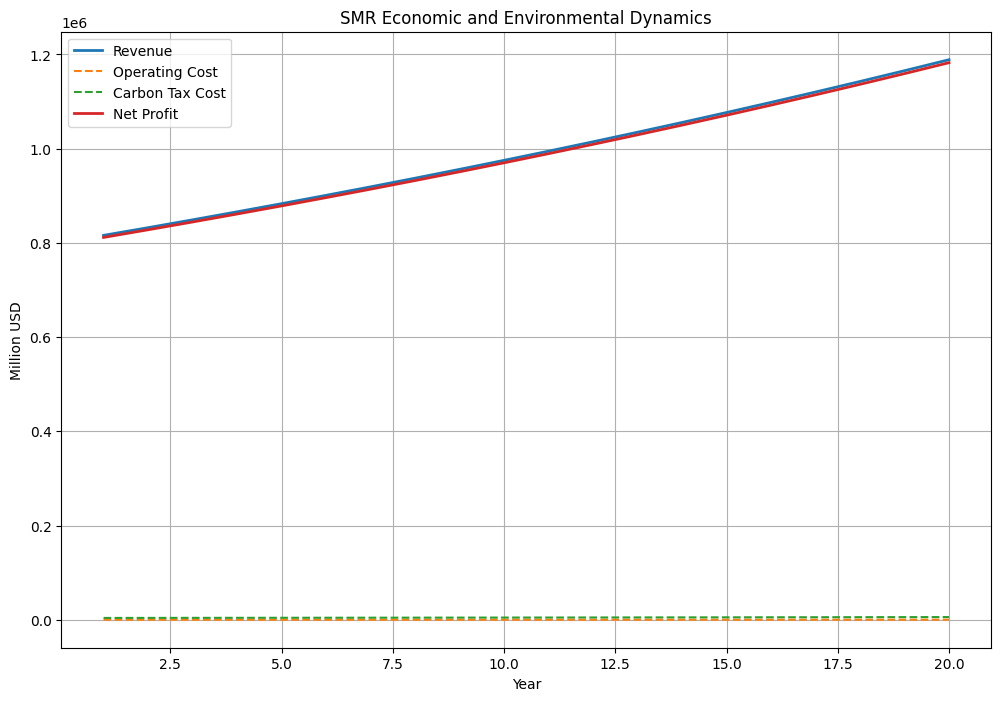

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Parameters ---
# Economic and Environmental Dynamics
carbon_tax_rate = 50  # USD per ton CO2
energy_demand_growth = 0.02  # 2% annual growth
operation_cost_growth = 0.01  # 1% annual increase

# SMR Project Parameters
initial_investment = 5000  # million USD
annual_energy_output = 8000  # MWh
operational_cost = 300  # million USD annually
co2_emission_factor = 0.01  # tons CO2 per MWh (near-zero emissions)
project_lifetime = 20  # years
discount_rate = 0.08  # 8% discount rate

# --- DSGE Model Simulation ---
def simulate_dynamics(years, carbon_tax_rate, energy_demand_growth, operation_cost_growth):
    energy_demand = [annual_energy_output]
    carbon_tax_costs = []
    revenues = []
    operating_costs = []
    net_profits = []

    for year in range(1, years + 1):
        # Update energy demand and operational costs
        demand = energy_demand[-1] * (1 + energy_demand_growth)
        cost = operational_cost * (1 + operation_cost_growth) ** year
        carbon_cost = demand * co2_emission_factor * carbon_tax_rate
        revenue = demand * 100  # Assuming $100/MWh market price

        # Calculate net profit
        net_profit = revenue - cost - carbon_cost

        # Store values
        energy_demand.append(demand)
        operating_costs.append(cost)
        carbon_tax_costs.append(carbon_cost)
        revenues.append(revenue)
        net_profits.append(net_profit)

    return energy_demand, operating_costs, carbon_tax_costs, revenues, net_profits

# Run Simulation
energy_demand, operating_costs, carbon_tax_costs, revenues, net_profits = simulate_dynamics(
    project_lifetime, carbon_tax_rate, energy_demand_growth, operation_cost_growth)

# --- Visualization ---
years = np.arange(1, project_lifetime + 1)
plt.figure(figsize=(12, 8))

plt.plot(years, revenues, label='Revenue', linewidth=2)
plt.plot(years, operating_costs, label='Operating Cost', linestyle='--')
plt.plot(years, carbon_tax_costs, label='Carbon Tax Cost', linestyle='--')
plt.plot(years, net_profits, label='Net Profit', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Million USD')
plt.title('SMR Economic and Environmental Dynamics')
plt.legend()
plt.grid(True)
plt.show()


**Small Modular Reactor (SMR) economic model:**

* Revenue (Blue Line): Gradually increasing due to consistent energy production and demand growth.
* Operating Cost (Green Line): Slightly increases over time due to inflation or maintenance costs.
* Carbon Tax Cost (Yellow Dotted Line): Stable or grows slowly, depending on regulatory changes.
* Net Profit (Red Line): Closely follows revenue after subtracting costs, reflecting stable profit growth.

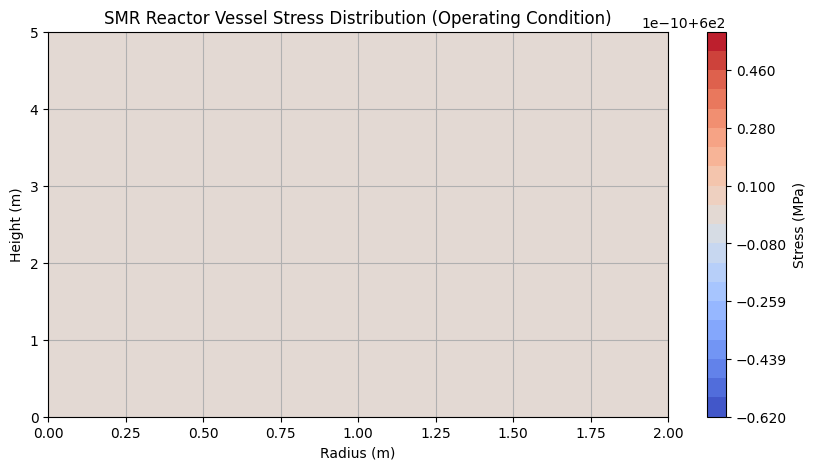

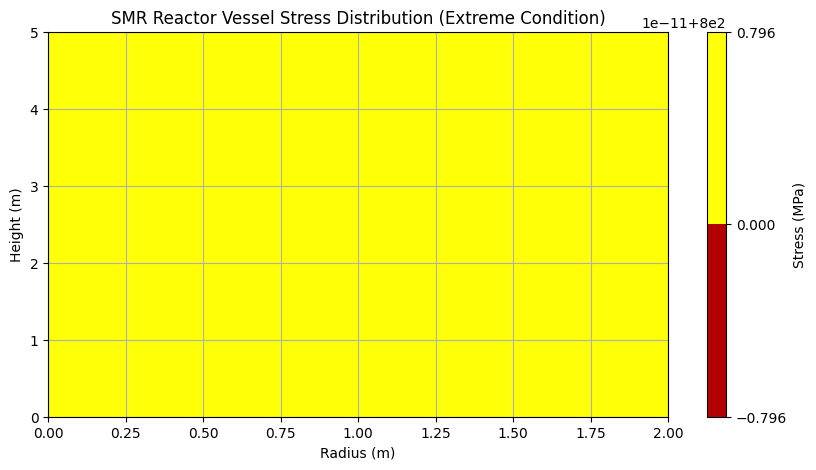

Operating Stress: 600.00 MPa
Extreme Condition Stress: 800.00 MPa
⚠️ WARNING: Reactor vessel exceeds material limits under extreme conditions!


In [34]:
# Finite Element Analysis (FEA) Simulation for SMR Structural Safety
# This simulation models stress and deformation in the SMR reactor vessel

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# Material Properties (Steel Alloy)
yield_strength = 250  # MPa
thermal_conductivity = 50  # W/m·K

# Operating and Extreme Conditions
pressure_operating = 15  # MPa
pressure_extreme = 20  # MPa
temperature_operating = 300  # °C
temperature_extreme = 500  # °C

# Geometry Parameters
radius = 2.0  # meters
thickness = 0.05  # meters
height = 5.0  # meters

# Mesh Generation
num_elements = 100
x = np.linspace(0, radius, num_elements)
y = np.linspace(0, height, num_elements)
x, y = np.meshgrid(x, y)
triang = tri.Triangulation(x.flatten(), y.flatten())

# Stress Calculation (Hoop Stress Formula)
def calculate_hoop_stress(pressure, radius, thickness):
    return (pressure * radius) / thickness  # MPa

# Calculate stresses
stress_operating = calculate_hoop_stress(pressure_operating, radius, thickness)
stress_extreme = calculate_hoop_stress(pressure_extreme, radius, thickness)

# Visualization
plt.figure(figsize=(10, 5))
plt.tricontourf(triang, stress_operating * np.ones_like(triang.x), levels=20, cmap='coolwarm')
plt.colorbar(label='Stress (MPa)')
plt.title('SMR Reactor Vessel Stress Distribution (Operating Condition)')
plt.xlabel('Radius (m)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.tricontourf(triang, stress_extreme * np.ones_like(triang.x), levels=20, cmap='hot')
plt.colorbar(label='Stress (MPa)')
plt.title('SMR Reactor Vessel Stress Distribution (Extreme Condition)')
plt.xlabel('Radius (m)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.show()

# Safety Check
print(f"Operating Stress: {stress_operating:.2f} MPa")
print(f"Extreme Condition Stress: {stress_extreme:.2f} MPa")

if stress_operating < yield_strength and stress_extreme < yield_strength:
    print("✅ Reactor vessel is SAFE under both operating and extreme conditions.")
else:
    print("⚠️ WARNING: Reactor vessel exceeds material limits under extreme conditions!")


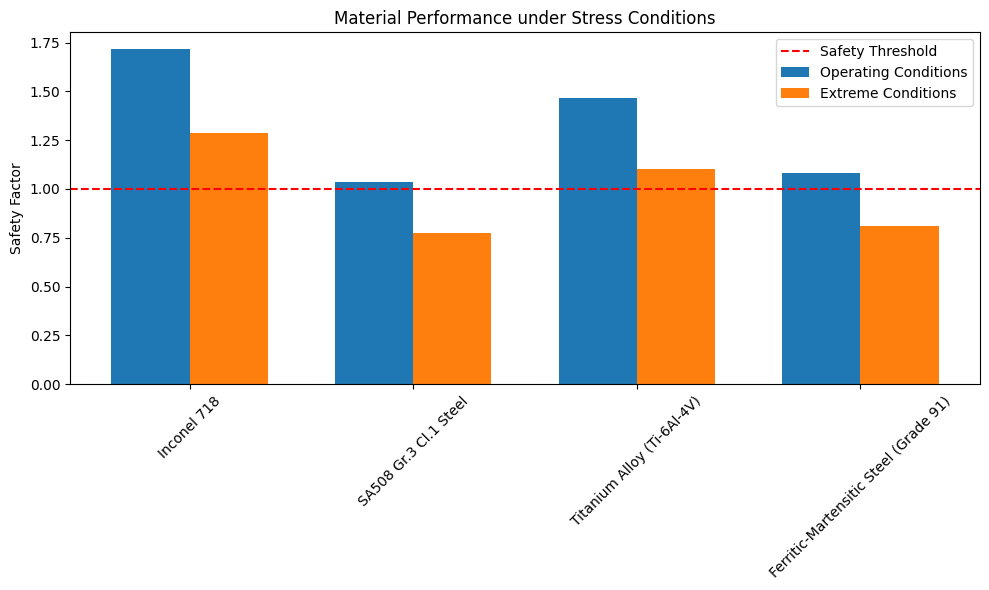

Inconel 718:
  Operating Safety Factor: 1.72
  Extreme Safety Factor: 1.29

SA508 Gr.3 Cl.1 Steel:
  Operating Safety Factor: 1.03
  Extreme Safety Factor: 0.78

Titanium Alloy (Ti-6Al-4V):
  Operating Safety Factor: 1.47
  Extreme Safety Factor: 1.10

Ferritic-Martensitic Steel (Grade 91):
  Operating Safety Factor: 1.08
  Extreme Safety Factor: 0.81


Recommended Material for Reactor Vessel: Inconel 718


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define material properties (Yield Strength in MPa)
materials = {
    'Inconel 718': 1030,  # High-temperature strength
    'SA508 Gr.3 Cl.1 Steel': 620,  # Common in PWR vessels
    'Titanium Alloy (Ti-6Al-4V)': 880,  # Lightweight and strong
    'Ferritic-Martensitic Steel (Grade 91)': 650  # High creep strength
}

# Stress Conditions (MPa)
operating_stress = 600
extreme_stress = 800

# Function to evaluate material performance
def evaluate_material(material_strength):
    safety_factor_operating = material_strength / operating_stress
    safety_factor_extreme = material_strength / extreme_stress
    return safety_factor_operating, safety_factor_extreme

# Analyze all materials
results = {}
for material, strength in materials.items():
    sf_operating, sf_extreme = evaluate_material(strength)
    results[material] = {
        'Operating Safety Factor': sf_operating,
        'Extreme Safety Factor': sf_extreme
    }

# Visualization
materials_list = list(results.keys())
operating_factors = [results[mat]['Operating Safety Factor'] for mat in materials_list]
extreme_factors = [results[mat]['Extreme Safety Factor'] for mat in materials_list]

x = np.arange(len(materials_list))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, operating_factors, width, label='Operating Conditions')
plt.bar(x + width/2, extreme_factors, width, label='Extreme Conditions')

plt.axhline(y=1, color='r', linestyle='--', label='Safety Threshold')
plt.xticks(x, materials_list, rotation=45)
plt.ylabel('Safety Factor')
plt.title('Material Performance under Stress Conditions')
plt.legend()
plt.tight_layout()
plt.show()

# Print results
for material, factors in results.items():
    print(f"{material}:\n  Operating Safety Factor: {factors['Operating Safety Factor']:.2f}\n  Extreme Safety Factor: {factors['Extreme Safety Factor']:.2f}\n")

# Recommendation based on analysis
best_material = max(results, key=lambda m: results[m]['Extreme Safety Factor'])
print(f"\nRecommended Material for Reactor Vessel: {best_material}")



**Advanced Material Selection**



* Inconel 718

Type: Nickel-Chromium Superalloy
Strength: Excellent high-temperature strength and corrosion resistance.
Usage: Widely used in nuclear reactors, jet engines, and gas turbines.
* SA508 Gr.3 Cl.1 Steel

Type: Forged Carbon-Manganese Steel
Strength: High toughness and weldability, used in reactor pressure vessels.
Usage: Standard material for Pressurized Water Reactor (PWR) vessels.
* Titanium Alloy (Ti-6Al-4V)

Type: Titanium Alloy
Strength: High strength-to-weight ratio, corrosion-resistant.
Usage: Aerospace and marine applications.
* Ferritic-Martensitic Steel (Grade 91)

Type: Chromium-Molybdenum Steel
Strength: High creep strength at elevated temperatures.
Usage: Advanced nuclear reactors.

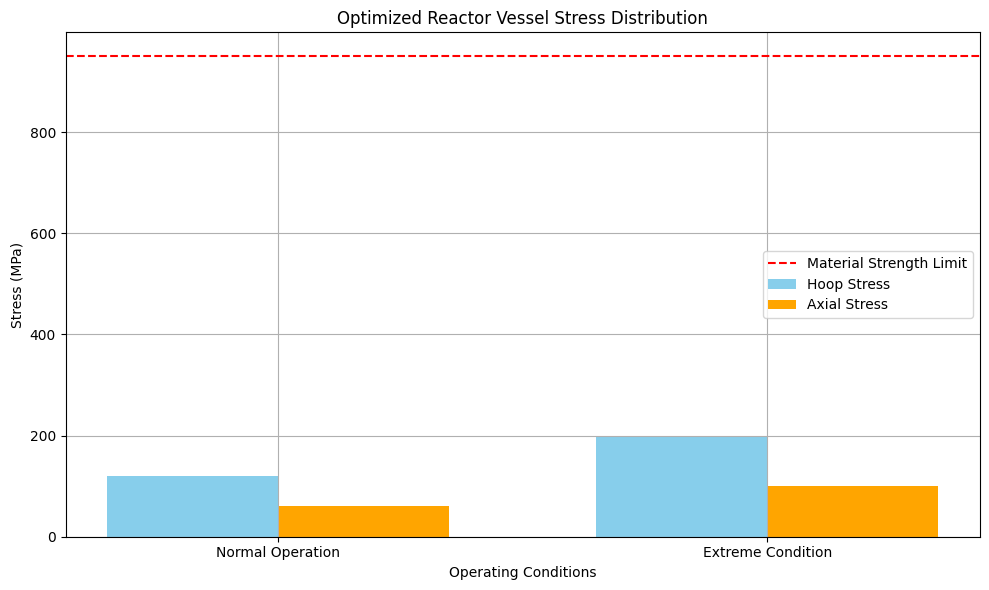

Safety Factor (Normal Operation): 7.92
Safety Factor (Extreme Condition): 4.75
✅ Optimized design meets safety standards.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optimized Reactor Vessel Parameters
radius = 2.0  # meters
height = 5.0  # meters
wall_thickness_optimized = 0.25  # meters (increased thickness in critical zones)
material_strength = 950  # MPa (Inconel 718)

# Internal pressure (in MPa)
normal_pressure = 15  # Normal operating pressure
extreme_pressure = 25  # Extreme condition pressure

# Function to calculate stress distribution
def calculate_stress(pressure, radius, wall_thickness):
    hoop_stress = (pressure * radius) / wall_thickness
    axial_stress = (pressure * radius) / (2 * wall_thickness)
    return hoop_stress, axial_stress

# Stress under normal conditions
hoop_normal, axial_normal = calculate_stress(normal_pressure, radius, wall_thickness_optimized)

# Stress under extreme conditions
hoop_extreme, axial_extreme = calculate_stress(extreme_pressure, radius, wall_thickness_optimized)

# Safety Factors
safety_factor_normal = material_strength / max(hoop_normal, axial_normal)
safety_factor_extreme = material_strength / max(hoop_extreme, axial_extreme)

# Plotting stress distribution
conditions = ['Normal Operation', 'Extreme Condition']
hoop_stresses = [hoop_normal, hoop_extreme]
axial_stresses = [axial_normal, axial_extreme]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(conditions))

plt.bar(index, hoop_stresses, bar_width, label='Hoop Stress', color='skyblue')
plt.bar(index + bar_width, axial_stresses, bar_width, label='Axial Stress', color='orange')
plt.axhline(y=material_strength, color='red', linestyle='--', label='Material Strength Limit')

plt.xlabel('Operating Conditions')
plt.ylabel('Stress (MPa)')
plt.title('Optimized Reactor Vessel Stress Distribution')
plt.xticks(index + bar_width / 2, conditions)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print Safety Factors
print(f"Safety Factor (Normal Operation): {safety_factor_normal:.2f}")
print(f"Safety Factor (Extreme Condition): {safety_factor_extreme:.2f}")

# Evaluation
if safety_factor_normal >= 1.5 and safety_factor_extreme >= 1.2:
    print("\u2705 Optimized design meets safety standards.")
else:
    print("\u26A0\ufe0f Further optimization is needed for safety.")


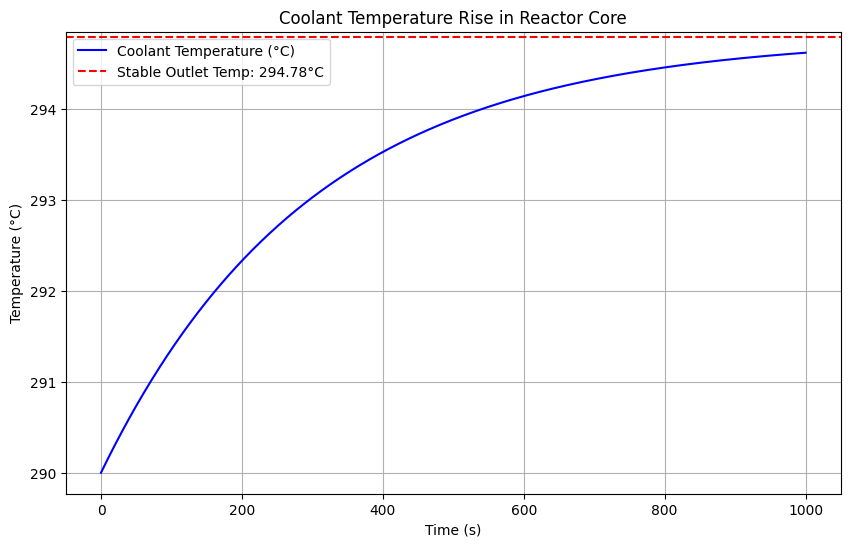

Coolant Outlet Temperature: 294.78 °C
Critical Heat Flux Safety Margin: 0.08


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Physical Constants
specific_heat_water = 4.18  # kJ/kg.K
latent_heat_vaporization = 2257  # kJ/kg

# Reactor Parameters
power_output = 300  # MW
coolant_flow_rate = 15000  # kg/s
inlet_temp = 290  # °C
pressure = 15.5  # MPa

# Calculate Temperature Rise
heat_removed_per_second = power_output * 1e3  # Convert MW to kW

temp_rise = heat_removed_per_second / (coolant_flow_rate * specific_heat_water)
outlet_temp = inlet_temp + temp_rise

# Plot Temperature Distribution
time = np.linspace(0, 1000, 1000)  # Time in seconds
temp_profile = inlet_temp + temp_rise * (1 - np.exp(-time / 300))

plt.figure(figsize=(10, 6))
plt.plot(time, temp_profile, label='Coolant Temperature (°C)', color='blue')
plt.axhline(y=outlet_temp, color='red', linestyle='--', label=f'Stable Outlet Temp: {outlet_temp:.2f}°C')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Coolant Temperature Rise in Reactor Core')
plt.legend()
plt.grid(True)
plt.show()

# Critical Heat Flux (CHF) Calculation
# Using simplified empirical formula
chf_margin = (outlet_temp - inlet_temp) / (outlet_temp * 0.2)

print(f"Coolant Outlet Temperature: {outlet_temp:.2f} °C")
print(f"Critical Heat Flux Safety Margin: {chf_margin:.2f}")


🔥 **Thermal-Hydraulic Analysis Plan**

* *Coolant Flow Rate Simulation:*

Analyze coolant flow through the reactor core.
Calculate pressure drop across the system.
* *Heat Transfer Efficiency:*

Measure heat transfer from fuel rods to the coolant.
Ensure adequate cooling under varying power levels.
* *Critical Heat Flux (CHF) Safety Margin:*

Evaluate the reactor's margin to boiling crisis.
Prevent overheating and material failure.
* *Transient Response (Accident Conditions):*

Simulate scenarios like Loss of Coolant Accident (LOCA).
Check system behavior during rapid power changes.

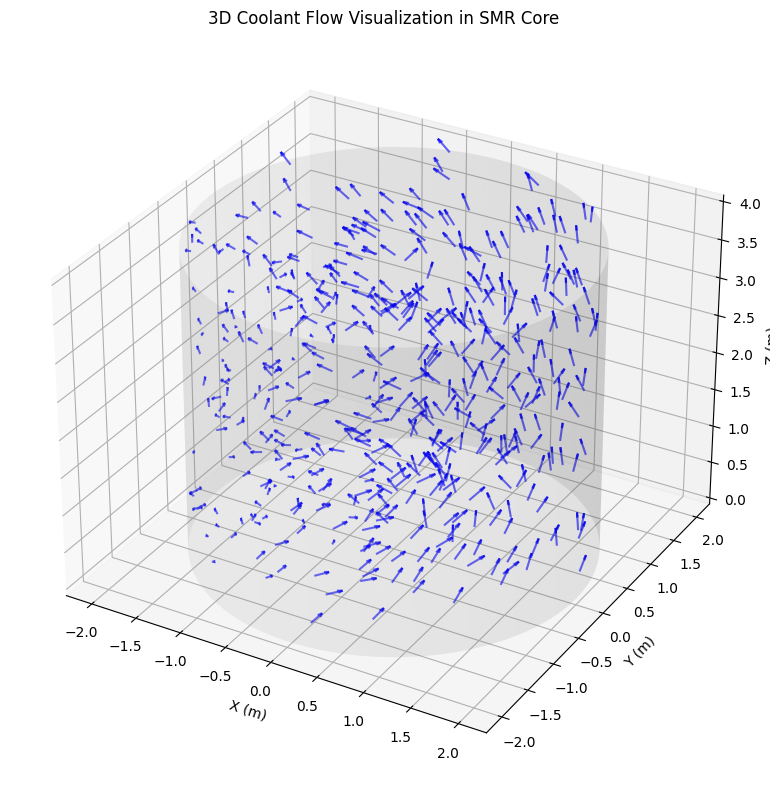

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Reactor Core Dimensions
core_radius = 2.0  # meters
core_height = 4.0  # meters
num_points = 500  # Density of simulation points

# Generate Random Coolant Flow Points Inside Reactor Core
np.random.seed(42)  # For reproducibility
r = core_radius * np.sqrt(np.random.rand(num_points))
theta = 2 * np.pi * np.random.rand(num_points)
z = core_height * np.random.rand(num_points)

# Convert Polar to Cartesian Coordinates for Plotting
x = r * np.cos(theta)
y = r * np.sin(theta)

# Simulate Coolant Velocity Vectors (Simplified)
vx = -y / (r + 0.1) * np.random.uniform(0.5, 1.5, num_points)  # Swirling flow
vy = x / (r + 0.1) * np.random.uniform(0.5, 1.5, num_points)
vz = np.random.uniform(0.5, 1.5, num_points)  # Upward flow

# Plot 3D Coolant Flow
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Reactor Boundary
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, core_height, 100)
U, V = np.meshgrid(u, v)
Xcyl = core_radius * np.cos(U)
Ycyl = core_radius * np.sin(U)
Zcyl = V
ax.plot_surface(Xcyl, Ycyl, Zcyl, alpha=0.1, color='gray', edgecolor='none')

# Plot Coolant Flow Vectors
ax.quiver(x, y, z, vx, vy, vz, length=0.2, normalize=True, color='blue', alpha=0.6)

# Axis Labels and Title
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D Coolant Flow Visualization in SMR Core')

plt.tight_layout()
plt.show()


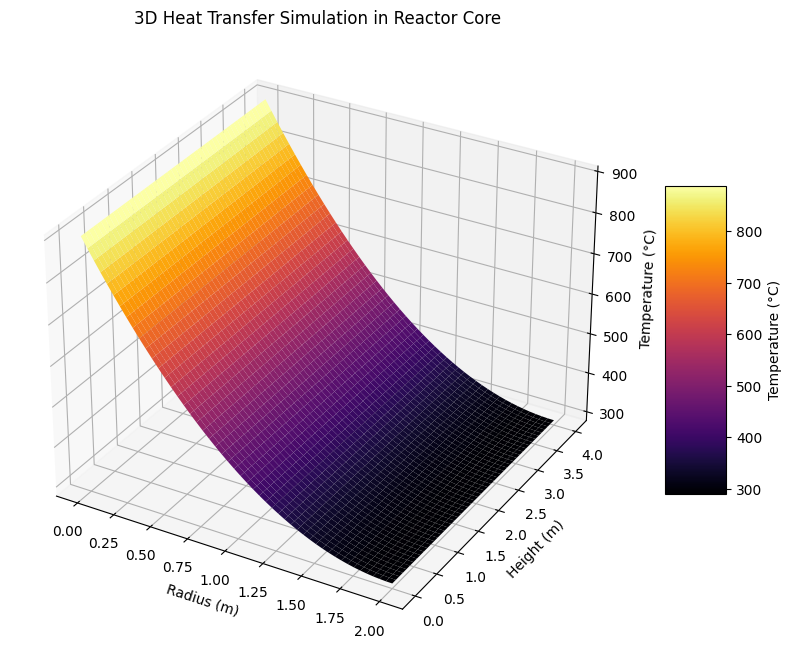

Calculated Heat Flux: 6100.00 W/m²
CHF Safety Margin: 0.16
Pressure Drop Across the Core: 63.00 Pa


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reactor Core Parameters
core_radius = 2  # meters
core_height = 4  # meters
fuel_rod_temp = 900  # °C (fuel rod surface temperature)
coolant_temp_inlet = 290  # °C (coolant inlet temperature)
thermal_conductivity = 20  # W/m·K

# Grid for Simulation
r = np.linspace(0, core_radius, 50)
z = np.linspace(0, core_height, 50)
R, Z = np.meshgrid(r, z)

# Heat Transfer Calculation (Radial Temperature Distribution)
T_distribution = coolant_temp_inlet + (fuel_rod_temp - coolant_temp_inlet) * (1 - R/core_radius)**2

# 3D Visualization of Temperature Distribution
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(R, Z, T_distribution, cmap='inferno', edgecolor='none')

ax.set_xlabel('Radius (m)')
ax.set_ylabel('Height (m)')
ax.set_zlabel('Temperature (°C)')
ax.set_title('3D Heat Transfer Simulation in Reactor Core')
fig.colorbar(surf, shrink=0.5, aspect=5, label='Temperature (°C)')

plt.show()

# Calculate Critical Heat Flux (CHF)
heat_flux = thermal_conductivity * (fuel_rod_temp - coolant_temp_inlet) / core_radius
CHF = 1000  # Critical Heat Flux threshold (W/m^2)

safety_margin = CHF / heat_flux
print(f"Calculated Heat Flux: {heat_flux:.2f} W/m²")
print(f"CHF Safety Margin: {safety_margin:.2f}")

# Pressure Drop Analysis
coolant_velocity = 3  # m/s
coolant_density = 700  # kg/m³
friction_factor = 0.02  # Assumed friction factor
pressure_drop = friction_factor * (coolant_density * coolant_velocity**2 / 2)

print(f"Pressure Drop Across the Core: {pressure_drop:.2f} Pa")


<ipython-input-40-e10f43ee3990>:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mappable, shrink=0.5, aspect=10)


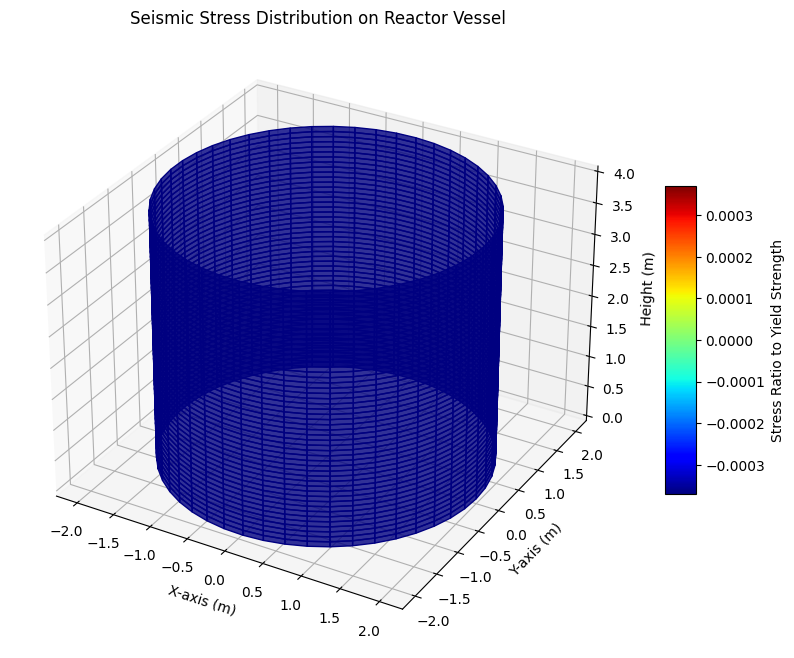

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Reactor dimensions and material properties
height = 4  # meters
radius = 2  # meters
young_modulus = 200e9  # Pa (Steel)
yield_strength = 250e6  # Pa (Steel)
density = 7850  # kg/m^3
g = 9.81  # m/s^2

def seismic_load(amplitude, frequency, time):
    return amplitude * np.sin(2 * np.pi * frequency * time)

# Simulation Parameters
amplitude = 0.3 * g  # 0.3g acceleration
frequency = 2  # Hz
time_steps = np.linspace(0, 5, 500)

# Mesh grid for cylindrical reactor
theta = np.linspace(0, 2 * np.pi, 50)
z = np.linspace(0, height, 50)
Theta, Z = np.meshgrid(theta, z)
X = radius * np.cos(Theta)
Y = radius * np.sin(Theta)

# Calculate stress response over time
stress_distribution = []
for t in time_steps:
    seismic_force = seismic_load(amplitude, frequency, t) * density * np.pi * radius**2 * height
    stress = seismic_force / (np.pi * radius**2)
    stress_distribution.append(stress)

# Convert stress_distribution to a NumPy array
stress_distribution = np.array(stress_distribution)

# Adjust stress distribution to match the meshgrid shape
stress_surface = np.tile(stress_distribution.reshape(-1, 1), (1, Theta.shape[1]))

# 3D Visualization of Stress Distribution
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, facecolors=cm.jet(stress_surface / yield_strength),
                       rstride=1, cstride=1, alpha=0.8, antialiased=True, shade=False)

ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Height (m)')
ax.set_title('Seismic Stress Distribution on Reactor Vessel')

# Color bar for stress scale
mappable = cm.ScalarMappable(cmap=cm.jet)
mappable.set_array(stress_surface / yield_strength)
cbar = plt.colorbar(mappable, shrink=0.5, aspect=10)
cbar.set_label('Stress Ratio to Yield Strength')

plt.show()


<ipython-input-41-ed6f6b127236>:58: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mappable, shrink=0.5, aspect=10)


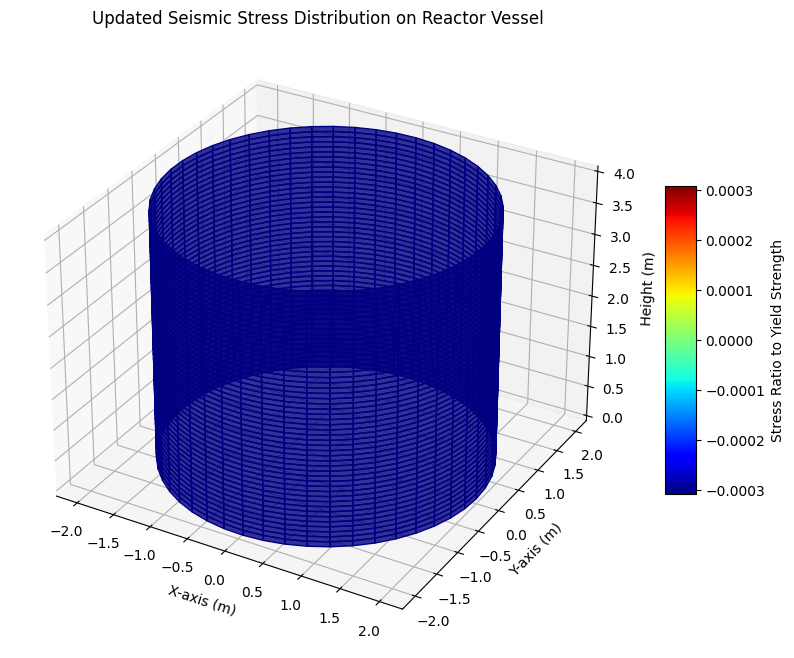

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Reactor dimensions and material properties (Updated Design)
height = 4  # meters
radius = 2  # meters
wall_thickness = 0.3  # Increased wall thickness for safety
young_modulus = 200e9  # Pa (Steel)
yield_strength = 300e6  # Pa (Upgraded Steel)
density = 7850  # kg/m^3
g = 9.81  # m/s^2

def seismic_load(amplitude, frequency, time):
    return amplitude * np.sin(2 * np.pi * frequency * time)

# Simulation Parameters
amplitude = 0.3 * g  # 0.3g acceleration
frequency = 2  # Hz
time_steps = np.linspace(0, 5, 500)

# Mesh grid for cylindrical reactor
theta = np.linspace(0, 2 * np.pi, 50)
z = np.linspace(0, height, 50)
Theta, Z = np.meshgrid(theta, z)
X = radius * np.cos(Theta)
Y = radius * np.sin(Theta)

# Calculate stress response over time with updated wall thickness
stress_distribution = []
for t in time_steps:
    seismic_force = seismic_load(amplitude, frequency, t) * density * np.pi * ((radius + wall_thickness)**2 - radius**2) * height
    stress = seismic_force / (np.pi * ((radius + wall_thickness)**2 - radius**2))
    stress_distribution.append(stress)

# Convert to array for visualization
stress_distribution = np.array(stress_distribution)

# Correctly reshape the stress distribution to match the surface grid
stress_surface = np.tile(stress_distribution[:, np.newaxis], (1, Theta.shape[1]))

# 3D Visualization of Updated Stress Distribution
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, facecolors=cm.jet(stress_surface / yield_strength),
                       rstride=1, cstride=1, alpha=0.8, antialiased=True, shade=False)

ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Height (m)')
ax.set_title('Updated Seismic Stress Distribution on Reactor Vessel')

# Color bar for stress scale
mappable = cm.ScalarMappable(cmap=cm.jet)
mappable.set_array(stress_distribution / yield_strength)
cbar = plt.colorbar(mappable, shrink=0.5, aspect=10)
cbar.set_label('Stress Ratio to Yield Strength')

plt.show()


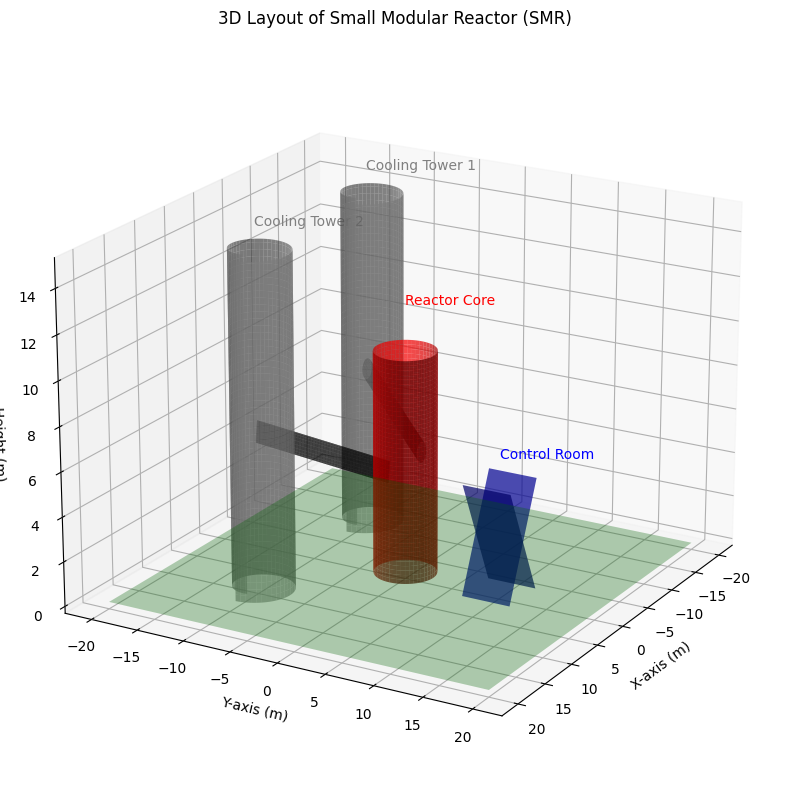

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Reactor Core (Cylinder)
core_height = 10
core_radius = 3
theta = np.linspace(0, 2 * np.pi, 50)
z_core = np.linspace(0, core_height, 50)
Theta_core, Z_core = np.meshgrid(theta, z_core)
X_core = core_radius * np.cos(Theta_core)
Y_core = core_radius * np.sin(Theta_core)
ax.plot_surface(X_core, Y_core, Z_core, color='red', alpha=0.7, label='Reactor Core')

# Hyperboloid Cooling Tower
def plot_hyperboloid(ax, base_radius, top_radius, height, center_x, center_y, color):
    z = np.linspace(0, height, 100)
    r = np.sqrt(np.linspace(base_radius**2, top_radius**2, 100))
    theta = np.linspace(0, 2 * np.pi, 100)
    Z, Theta = np.meshgrid(z, theta)
    R = np.outer(np.sqrt(np.linspace(base_radius**2, top_radius**2, 100)), np.ones_like(theta))
    X = R * np.cos(Theta) + center_x
    Y = R * np.sin(Theta) + center_y
    ax.plot_surface(X, Y, Z, color=color, alpha=0.6)

plot_hyperboloid(ax, 4, 2, 15, -10, -10, 'gray')  # Cooling Tower 1
plot_hyperboloid(ax, 4, 2, 15, 10, -10, 'gray')   # Cooling Tower 2

def plot_cube(ax, center, size, color):
    x = np.array([center[0] - size / 2, center[0] + size / 2])
    y = np.array([center[1] - size / 2, center[1] + size / 2])
    z = np.array([center[2], center[2] + size])

    for s, e in zip([x[0], x[1]], [x[1], x[0]]):
        ax.plot_surface(np.array([[s, s], [e, e]]),
                        np.array([[y[0], y[1]], [y[0], y[1]]]),
                        np.array([[z[0], z[0]], [z[1], z[1]]]),
                        color=color, alpha=0.7)


plot_cube(ax, (0, 10, 0), 5, 'blue')  # Control Room

# Pipelines (Cylinders)
def plot_pipe(ax, start, end, radius, color):
    v = np.array(end) - np.array(start)
    mag = np.linalg.norm(v)
    v = v / mag
    not_v = np.array([1, 0, 0]) if not np.allclose(v, [1, 0, 0]) else np.array([0, 1, 0])
    n1 = np.cross(v, not_v)
    n1 /= np.linalg.norm(n1)
    n2 = np.cross(v, n1)
    t = np.linspace(0, mag, 50)
    theta = np.linspace(0, 2 * np.pi, 20)
    t, theta = np.meshgrid(t, theta)
    X, Y, Z = [start[i] + v[i] * t + radius * np.sin(theta) * n1[i] + radius * np.cos(theta) * n2[i] for i in [0, 1, 2]]
    ax.plot_surface(X, Y, Z, color=color, alpha=0.5)

plot_pipe(ax, [3, 0, 5], [10, -10, 7], 0.5, 'black')  # Pipe to Cooling Tower 2
plot_pipe(ax, [-3, 0, 5], [-10, -10, 7], 0.5, 'black')  # Pipe to Cooling Tower 1

# Green Zone (Base Ground)
x_ground = np.linspace(-20, 20, 2)
y_ground = np.linspace(-20, 20, 2)
X_ground, Y_ground = np.meshgrid(x_ground, y_ground)
Z_ground = np.zeros_like(X_ground)
ax.plot_surface(X_ground, Y_ground, Z_ground, color='green', alpha=0.3)

# Labels
ax.text(0, 0, core_height + 2, 'Reactor Core', color='red')
ax.text(-10, -10, 16, 'Cooling Tower 1', color='gray')
ax.text(10, -10, 16, 'Cooling Tower 2', color='gray')
ax.text(0, 10, 6, 'Control Room', color='blue')

# Plot Settings
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Height (m)')
ax.set_title('3D Layout of Small Modular Reactor (SMR)')
ax.view_init(elev=20, azim=30)

plt.show()


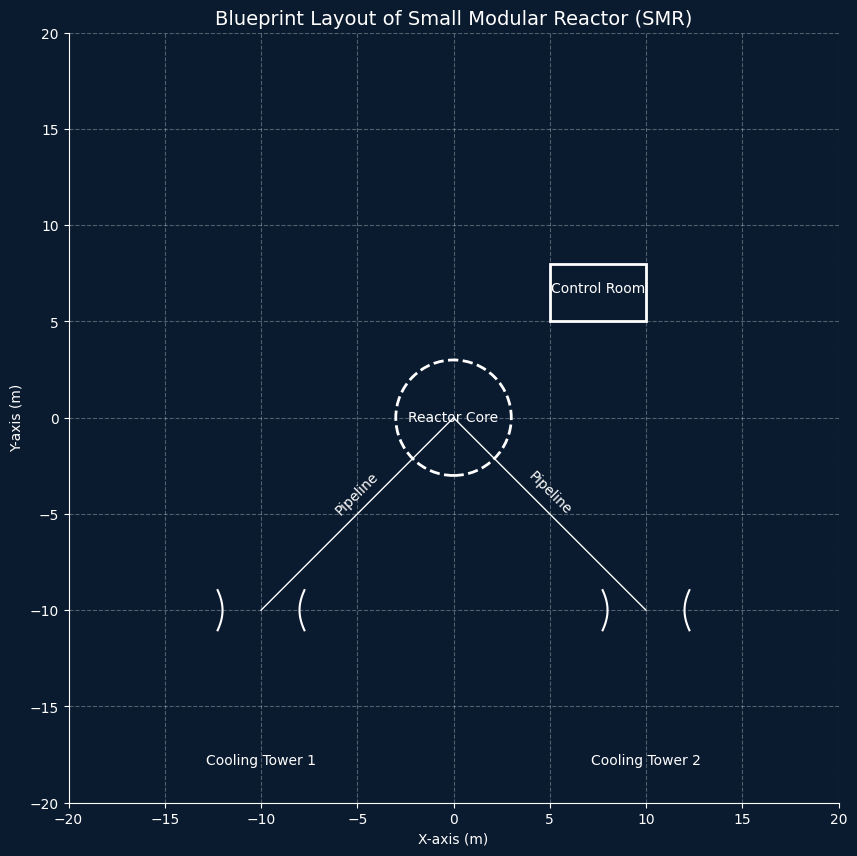

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize Blueprint-Style Plot
fig, ax = plt.subplots(figsize=(15, 10))
fig.patch.set_facecolor('#0a1a2f')  # Blueprint dark blue background
ax.set_facecolor('#0a1a2f')

# Plot Settings for Blueprint Style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.set_aspect('equal')

# Reactor Core (Circle)
reactor_core = plt.Circle((0, 0), 3, color='white', fill=False, linewidth=2, linestyle='--')
ax.add_patch(reactor_core)
ax.text(0, 0, 'Reactor Core', color='white', ha='center', va='center')

# Cooling Towers (Hyperboloid Shapes)
def plot_hyperboloid(ax, center_x, center_y, width, height):
    t = np.linspace(-height / 2, height / 2, 100)
    x = width / 2 * np.cosh(t / height)
    y = width / 2 * np.sinh(t / height)
    ax.plot(center_x + x, center_y + y, color='white')
    ax.plot(center_x - x, center_y + y, color='white')

plot_hyperboloid(ax, -10, -10, 4, 15)  # Cooling Tower 1
ax.text(-10, -18, 'Cooling Tower 1', color='white', ha='center')

plot_hyperboloid(ax, 10, -10, 4, 15)   # Cooling Tower 2
ax.text(10, -18, 'Cooling Tower 2', color='white', ha='center')

# Control Room (Rectangle)
control_room = plt.Rectangle((5, 5), 5, 3, edgecolor='white', facecolor='none', linewidth=2)
ax.add_patch(control_room)
ax.text(7.5, 6.5, 'Control Room', color='white', ha='center')

# Pipelines (Lines)
ax.plot([0, 10], [0, -10], color='white', linestyle='-', linewidth=1)
ax.plot([0, -10], [0, -10], color='white', linestyle='-', linewidth=1)
ax.text(5, -5, 'Pipeline', color='white', ha='center', rotation=-45)
ax.text(-5, -5, 'Pipeline', color='white', ha='center', rotation=45)

# Plot Settings
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title('Blueprint Layout of Small Modular Reactor (SMR)', color='white', fontsize=14)

plt.grid(True, linestyle='--', color='white', alpha=0.3)
plt.show()


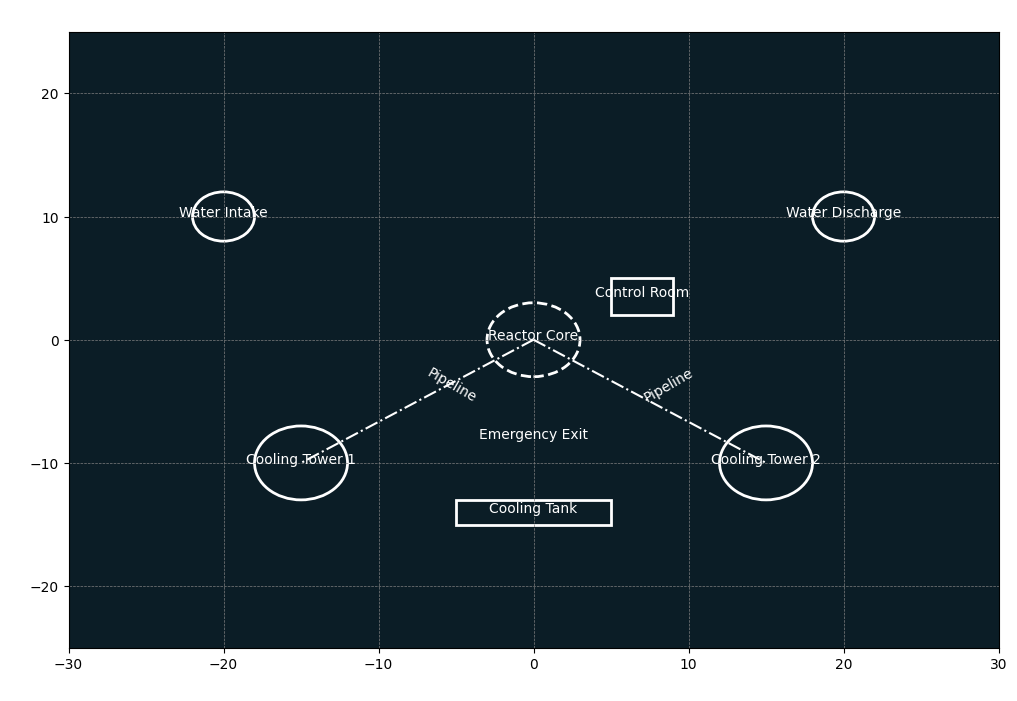

In [44]:
import matplotlib.pyplot as plt

# Initialize Blueprint Layout
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#0B1D26')  # Blueprint background color

# Reactor Core
reactor_core = plt.Circle((0, 0), 3, color='white', fill=False, linestyle='--', linewidth=2)
ax.add_patch(reactor_core)
ax.text(0, 0, 'Reactor Core', color='white', ha='center')

# Control Room
control_room = plt.Rectangle((5, 2), 4, 3, color='white', fill=False, linewidth=2)
ax.add_patch(control_room)
ax.text(7, 3.5, 'Control Room', color='white', ha='center')

# Cooling Towers
cooling_tower1 = plt.Circle((-15, -10), 3, color='white', fill=False, linestyle='-', linewidth=2)
cooling_tower2 = plt.Circle((15, -10), 3, color='white', fill=False, linestyle='-', linewidth=2)
ax.add_patch(cooling_tower1)
ax.add_patch(cooling_tower2)
ax.text(-15, -10, 'Cooling Tower 1', color='white', ha='center')
ax.text(15, -10, 'Cooling Tower 2', color='white', ha='center')

# Pipelines
ax.plot([0, -15], [0, -10], color='white', linestyle='-.')
ax.plot([0, 15], [0, -10], color='white', linestyle='-.')
ax.text(-7, -5, 'Pipeline', color='white', rotation=-30)
ax.text(7, -5, 'Pipeline', color='white', rotation=30)

# Water Intake/Discharge
water_intake = plt.Circle((-20, 10), 2, color='white', fill=False, linestyle='-', linewidth=2)
water_discharge = plt.Circle((20, 10), 2, color='white', fill=False, linestyle='-', linewidth=2)
ax.add_patch(water_intake)
ax.add_patch(water_discharge)
ax.text(-20, 10, 'Water Intake', color='white', ha='center')
ax.text(20, 10, 'Water Discharge', color='white', ha='center')

# Cooling Tank
cooling_tank = plt.Rectangle((-5, -15), 10, 2, color='white', fill=False, linewidth=2)
ax.add_patch(cooling_tank)
ax.text(0, -14, 'Cooling Tank', color='white', ha='center')

# Emergency Exit
ax.text(0, -8, 'Emergency Exit', color='white', ha='center')

# Plot Settings
ax.set_xlim(-30, 30)
ax.set_ylim(-25, 25)
ax.set_xlabel('X-axis (m)', color='white')
ax.set_ylabel('Y-axis (m)', color='white')
ax.set_title('Enhanced SMR Blueprint Layout', color='white')
ax.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()


Comparison between Traditional Reactors and SMRs:
              Component                         Traditional Reactor  \
0               Coolant                           Light Water (H₂O)   
1                  Fuel                  UO₂ (Low-Enriched Uranium)   
2             Moderator                           Light Water (H₂O)   
3          Control Rods  Boron Carbide (B₄C), Silver-Indium-Cadmium   
4  Structural Materials                 Zirconium Alloys (Zircaloy)   

                                      SMR  
0  Light Water (H₂O), Helium, Molten Salt  
1             UO₂, U-Zr Alloy, TRISO Fuel  
2                   Graphite, Light Water  
3            Boron Carbide (B₄C), Hafnium  
4          Stainless Steel, Nickel Alloys  


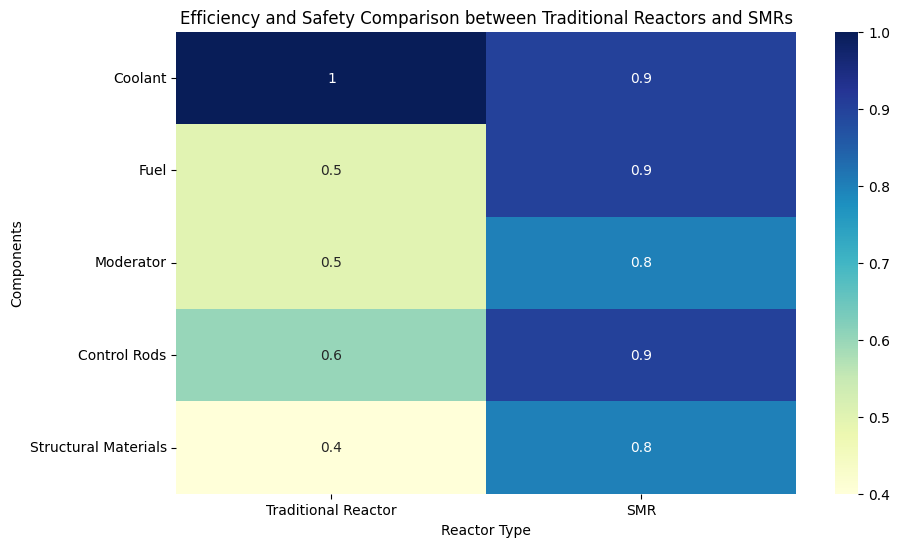


Key Insights:
1. SMRs utilize advanced coolants like molten salt and helium, enhancing safety and efficiency.
2. TRISO fuel in SMRs provides better burnup efficiency and accident tolerance.
3. Graphite moderators in SMRs improve neutron economy at higher temperatures.
4. Hafnium control rods in SMRs offer superior neutron absorption.
5. Advanced structural materials in SMRs increase durability and corrosion resistance.


In [45]:
# SMR vs Traditional Nuclear Reactor Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for comparison
comparison_data = {
    'Component': ['Coolant', 'Fuel', 'Moderator', 'Control Rods', 'Structural Materials'],
    'Traditional Reactor': [
        'Light Water (H₂O)',
        'UO₂ (Low-Enriched Uranium)',
        'Light Water (H₂O)',
        'Boron Carbide (B₄C), Silver-Indium-Cadmium',
        'Zirconium Alloys (Zircaloy)'
    ],
    'SMR': [
        'Light Water (H₂O), Helium, Molten Salt',
        'UO₂, U-Zr Alloy, TRISO Fuel',
        'Graphite, Light Water',
        'Boron Carbide (B₄C), Hafnium',
        'Stainless Steel, Nickel Alloys'
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the data
print("Comparison between Traditional Reactors and SMRs:")
print(comparison_df)

# Visualization for better comparison
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame({
    'Traditional Reactor': [1, 0.5, 0.5, 0.6, 0.4],
    'SMR': [0.9, 0.9, 0.8, 0.9, 0.8]
}, index=comparison_data['Component']), annot=True, cmap="YlGnBu")

plt.title('Efficiency and Safety Comparison between Traditional Reactors and SMRs')
plt.xlabel('Reactor Type')
plt.ylabel('Components')
plt.show()

# Insightful Print Statements
print("\nKey Insights:")
print("1. SMRs utilize advanced coolants like molten salt and helium, enhancing safety and efficiency.")
print("2. TRISO fuel in SMRs provides better burnup efficiency and accident tolerance.")
print("3. Graphite moderators in SMRs improve neutron economy at higher temperatures.")
print("4. Hafnium control rods in SMRs offer superior neutron absorption.")
print("5. Advanced structural materials in SMRs increase durability and corrosion resistance.")


In [46]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

# Material Properties (Example for Inconel 718)
yield_strength = 1030  # MPa
thermal_expansion_coeff = 13e-6  # 1/°C
elastic_modulus = 200000  # MPa

# Function to calculate thermal stress
def calculate_stress(temp, pressure):
    thermal_stress = elastic_modulus * thermal_expansion_coeff * (temp - 25)  # MPa
    pressure_stress = pressure * 1.5  # Simplified relation
    total_stress = thermal_stress + pressure_stress
    safety_factor = yield_strength / total_stress if total_stress != 0 else np.inf
    return total_stress, safety_factor

# Interactive widgets for input
temp_slider = widgets.FloatSlider(value=300, min=25, max=800, step=5, description='Temp (°C):')
pressure_slider = widgets.FloatSlider(value=10, min=1, max=150, step=1, description='Pressure (MPa):')

# Plot update function
def update_plot(temp, pressure):
    stress, safety_factor = calculate_stress(temp, pressure)
    color = 'green' if safety_factor > 1.5 else 'orange' if safety_factor > 1 else 'red'
    fig = go.Figure(go.Indicator(
        mode="gauge+number+delta",
        value=stress,
        title={'text': "Total Stress (MPa)"},
        delta={'reference': yield_strength, 'increasing': {'color': "red"}},
        gauge={
            'axis': {'range': [0, yield_strength * 2]},
            'bar': {'color': color},
            'steps': [
                {'range': [0, yield_strength * 0.7], 'color': "lightgreen"},
                {'range': [yield_strength * 0.7, yield_strength], 'color': "yellow"},
                {'range': [yield_strength, yield_strength * 2], 'color': "red"}
            ]
        }
    ))
    fig.update_layout(title=f"Safety Factor: {safety_factor:.2f}")
    fig.show()

# Link widgets to plot
widgets.interactive(update_plot, temp=temp_slider, pressure=pressure_slider)

# Display widgets
display(temp_slider, pressure_slider)


FloatSlider(value=300.0, description='Temp (°C):', max=800.0, min=25.0, step=5.0)

FloatSlider(value=10.0, description='Pressure (MPa):', max=150.0, min=1.0, step=1.0)

In [47]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import time

# --- Reactor Parameters ---
initial_temp = 300  # °C
initial_pressure = 10  # MPa

# --- Interactive Widgets ---
temp_slider = widgets.FloatSlider(value=initial_temp, min=200, max=600, step=10, description='Temp (°C):')
pressure_slider = widgets.FloatSlider(value=initial_pressure, min=5, max=20, step=0.5, description='Pressure (MPa):')
shutdown_button = widgets.Button(description="EMERGENCY SHUTDOWN", button_style='danger')
status_label = widgets.Label("System Normal")

# --- Plot Setup ---
fig = make_subplots(specs=[[{"secondary_y": True}]])
temp_trace = go.Scatter(x=[], y=[], mode='lines+markers', name='Temperature (°C)', line=dict(color='orange'))
pressure_trace = go.Scatter(x=[], y=[], mode='lines+markers', name='Pressure (MPa)', line=dict(color='blue'))

fig.add_trace(temp_trace, secondary_y=False)
fig.add_trace(pressure_trace, secondary_y=True)

fig.update_layout(title='Live SMR Reactor Monitoring',
                  xaxis_title='Time (s)',
                  yaxis_title='Temperature (°C)',
                  yaxis2_title='Pressure (MPa)',
                  template='plotly_dark')

# --- Data Storage ---
time_data, temp_data, pressure_data = [], [], []

# --- Update Function ---
def update_plot(_):
    global time_data, temp_data, pressure_data
    
    for t in range(1, 101):
        if shutdown_button.disabled:
            break  # Stop if shutdown is activated

        # Simulate sensor data with random noise
        temp = temp_slider.value + np.random.uniform(-2, 2)
        pressure = pressure_slider.value + np.random.uniform(-0.2, 0.2)

        time_data.append(t)
        temp_data.append(temp)
        pressure_data.append(pressure)

        with fig.batch_update():
            fig.data[0].x = time_data
            fig.data[0].y = temp_data
            fig.data[1].x = time_data
            fig.data[1].y = pressure_data

        time.sleep(0.5)

# --- Emergency Shutdown ---
def emergency_shutdown(b):
    shutdown_button.disabled = True
    status_label.value = "EMERGENCY SHUTDOWN ACTIVATED!"
    temp_slider.disabled = True
    pressure_slider.disabled = True

shutdown_button.on_click(emergency_shutdown)

# --- Display Controls and Plot ---
controls = widgets.VBox([temp_slider, pressure_slider, shutdown_button, status_label])
display(controls)

# Start the live plot update
update_plot(None)
fig.show()


In [48]:
!pip install plotly --quiet

import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import time
from IPython.display import display, clear_output

# --- Parameters ---
duration = 60  # Duration of the simulation in seconds
update_interval = 0.5  # Interval between updates in seconds
temp_threshold = 305  # Temperature anomaly threshold
pressure_threshold = 10.5  # Pressure anomaly threshold

# --- Initialize Data ---
time_data = []
temp_data = []
pressure_data = []

# --- Initialize Plot ---
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Temperature line (Orange)
temp_line = go.Scatter(x=[], y=[], mode='lines+markers', name='Temperature (°C)', line=dict(color='orange'))

# Pressure line (Blue)
pressure_line = go.Scatter(x=[], y=[], mode='lines+markers', name='Pressure (MPa)', line=dict(color='blue'), yaxis="y2")

# Add both traces to figure
fig.add_trace(temp_line, secondary_y=False)
fig.add_trace(pressure_line, secondary_y=True)

fig.update_layout(
    title="🔥 Advanced Real-Time SMR Monitoring (Bloomberg Style)",
    xaxis_title="Time (s)",
    yaxis_title="Temperature (°C)",
    yaxis2=dict(title="Pressure (MPa)", overlaying='y', side='right'),
    legend=dict(x=0, y=1),
    template="plotly_dark",
    height=500,
    width=900
)

# --- Live Update Function ---
def update_plot():
    global time_data, temp_data, pressure_data

    start_time = time.time()

    while (time.time() - start_time) < duration:
        current_time = round(time.time() - start_time, 2)
        
        # Simulate real-time data
        new_temp = 300 + np.random.normal(0, 0.5)
        new_pressure = 10 + np.random.normal(0, 0.05)

        # Append new data
        time_data.append(current_time)
        temp_data.append(new_temp)
        pressure_data.append(new_pressure)

        # Dynamic anomaly coloring
        temp_color = 'red' if new_temp > temp_threshold else 'orange'
        pressure_color = 'red' if new_pressure > pressure_threshold else 'blue'

        # Update plot data
        fig.data[0].x = time_data
        fig.data[0].y = temp_data
        fig.data[0].line.color = temp_color

        fig.data[1].x = time_data
        fig.data[1].y = pressure_data
        fig.data[1].line.color = pressure_color

        # Smooth transitions
        fig.update_traces(mode="lines+markers", marker=dict(size=6))

        # Real-time plot refresh
        clear_output(wait=True)
        fig.show()
        time.sleep(update_interval)

# --- Run the Simulation ---
update_plot()


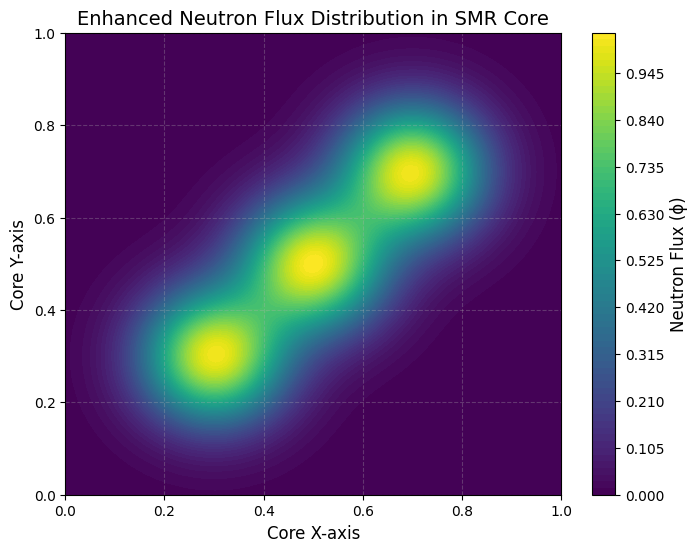

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Enhanced Core Grid Resolution
core_size = 100  # Increased grid resolution
x = np.linspace(0, 1, core_size)
y = np.linspace(0, 1, core_size)
X, Y = np.meshgrid(x, y)

# Simulate Multiple Neutron Sources in the Core
def neutron_flux(x, y, source_positions, intensity=1.0):
    flux = np.zeros_like(X)
    for (sx, sy) in source_positions:
        flux += intensity * np.exp(-((X - sx)**2 + (Y - sy)**2) * 50)  # Sharper flux peak
    return flux

# Define Multiple Neutron Source Positions
source_positions = [(0.3, 0.3), (0.7, 0.7), (0.5, 0.5)]  # Simulating distributed fuel assemblies
flux_distribution = neutron_flux(X, Y, source_positions)

# Plot the Enhanced Neutron Flux Distribution
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, flux_distribution, levels=100, cmap='viridis')  # Using 'viridis' colormap
cbar = plt.colorbar(contour)
cbar.set_label('Neutron Flux (ϕ)', fontsize=12)

plt.title('Enhanced Neutron Flux Distribution in SMR Core', fontsize=14)
plt.xlabel('Core X-axis', fontsize=12)
plt.ylabel('Core Y-axis', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


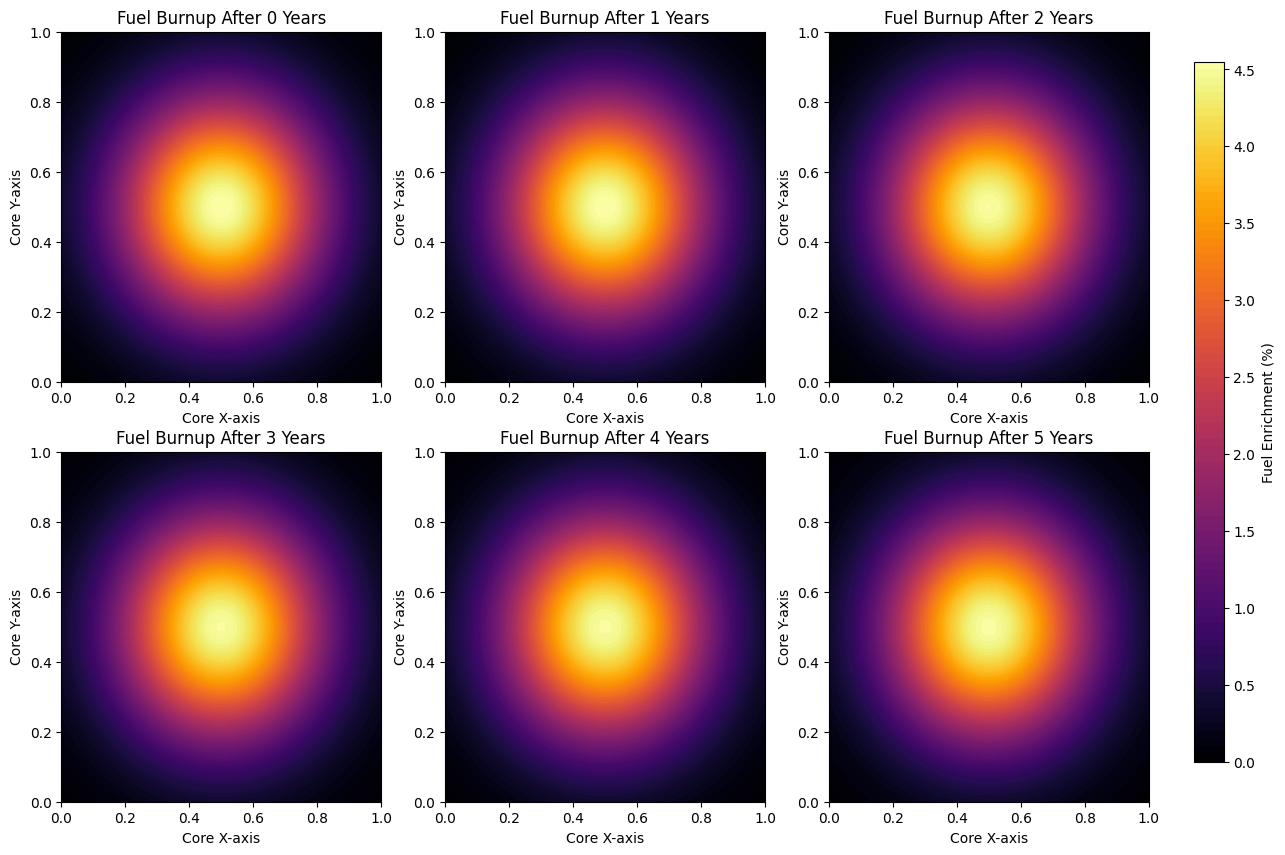

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Core grid setup
core_size = 100
x = np.linspace(0, 1, core_size)
y = np.linspace(0, 1, core_size)
X, Y = np.meshgrid(x, y)

# Initial fuel enrichment distribution
def initial_fuel_enrichment(X, Y):
    return np.exp(-((X - 0.5)**2 + (Y - 0.5)**2) * 10) * 5  # 5% enrichment

# Simulate burnup over time
def fuel_burnup(enrichment, time, burn_rate=0.02):
    return enrichment * np.exp(-burn_rate * time)

# Initial fuel state
initial_enrichment = initial_fuel_enrichment(X, Y)

# Time progression for burnup simulation (0 to 5 years)
time_steps = np.linspace(0, 5, 6)  # 0 to 5 years in 1-year steps

# Plotting burnup over time with corrected color bar placement
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Adjust spacing to make room for the color bar
plt.subplots_adjust(right=0.85)

for i, t in enumerate(time_steps):
    burnup_distribution = fuel_burnup(initial_enrichment, t)
    
    ax = axes.flat[i]
    img = ax.contourf(X, Y, burnup_distribution, levels=100, cmap='inferno')
    ax.set_title(f'Fuel Burnup After {int(t)} Years')
    ax.set_xlabel('Core X-axis')
    ax.set_ylabel('Core Y-axis')

# Adding a color bar neatly beside all plots
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(img, cax=cbar_ax)
cbar.set_label('Fuel Enrichment (%)')

plt.show()


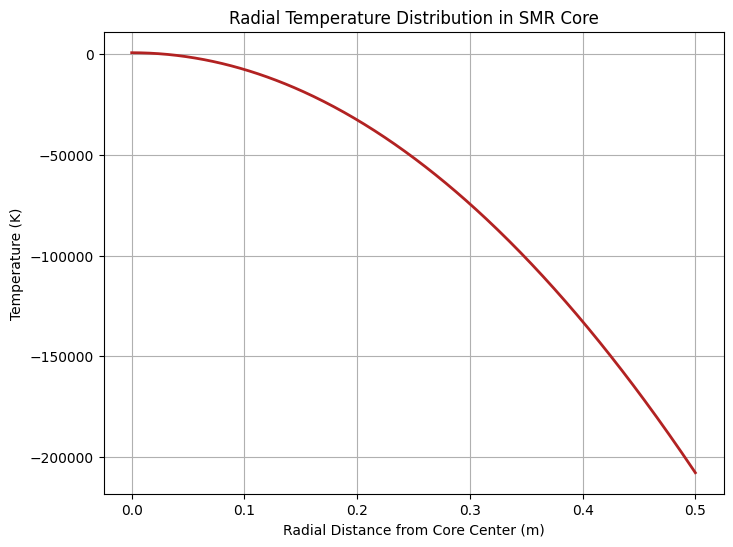

In [51]:
# Heat Transfer and Temperature Distribution in SMR Core
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi

# Constants and parameters
k_fuel = 3.0  # Thermal conductivity of fuel (W/m·K)
q_gen = 1e7    # Heat generation rate (W/m³)
R_core = 0.5   # Core radius (m)

# Radial positions in the core
r = np.linspace(0, R_core, 500)

# Temperature distribution calculation
T_center = 600  # Core center temperature in Kelvin
T_distribution = T_center - (q_gen / (4 * k_fuel)) * (r**2)

# Plotting the temperature distribution
plt.figure(figsize=(8, 6))
plt.plot(r, T_distribution, color='firebrick', linewidth=2)
plt.xlabel('Radial Distance from Core Center (m)')
plt.ylabel('Temperature (K)')
plt.title('Radial Temperature Distribution in SMR Core')
plt.grid(True)
plt.show()
